## Clustering of brain dataset (b1-b20) with corrected counts and doublet removal - final (?) version

In [6]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(scDblFinder)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Read in dataset and filter cells

In [2]:
# load in SoupX-corrected matrices
# note: samples names reflect new naming convention where all samples above brain 3 are reduced by 1 
# since brain 4 is actually absent (ie former b5 is now b4)
b1_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b1_tel/outs/strainedCounts")
b2_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b2_tel/outs/strainedCounts")
b3_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b3_tel/outs/strainedCounts")
b4_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b4_tel/outs/strainedCounts")
b5_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b5_tel/outs/strainedCounts")
b6_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b6_tel/outs/strainedCounts")

b7_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b7_tel/outs/strainedCounts")
b7_cer.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b7_cer/outs/strainedCounts")
b7_dien.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b7_dien/outs/strainedCounts")

b8_mult.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b8_mult/outs/strainedCounts")

b9_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b9_tel/outs/strainedCounts")

b10_tel.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b10_tel/outs/strainedCounts")
b10_ot.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b10_ot/outs/strainedCounts")
b10_cer.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b10_cer_f15k/outs/strainedCounts")
b10_dien.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b10_dien/outs/strainedCounts")

b11_mult.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b11_mult/outs/strainedCounts")
b12_mult.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b12_mult/outs/strainedCounts")
b13_mult.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b13_mult/outs/strainedCounts")

b14_gfap.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b14_gfap/outs/strainedCounts")

b15_mult.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b15_mult/outs/strainedCounts")

b16_gfap.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b16_gfap/outs/strainedCounts")

b17_tdmr.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b17_tdmr/outs/strainedCounts")

b18_dien.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b18_dien/outs/strainedCounts/")
b18_mes.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b18_mes/outs/strainedCounts/")
b18_rhom.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b18_rhom/outs/strainedCounts/")

b19_tdmr.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b19_tdmr/outs/strainedCounts")

b20_gfap.data <- Read10X(data.dir = "/local/Nina/10x_brains_trans/mapped_DR11_CR6/b20_gfap/outs/strainedCounts")

In [3]:
# create Seurat objects from each loaded matrix
b1_tel <- CreateSeuratObject(counts = b1_tel.data, project = "b1_tel", min.cells = 3, min.features = 200)
b2_tel <- CreateSeuratObject(counts = b2_tel.data, project = "b2_tel", min.cells = 3, min.features = 200)
b3_tel <- CreateSeuratObject(counts = b3_tel.data, project = "b3_tel", min.cells = 3, min.features = 200)
b4_tel <- CreateSeuratObject(counts = b4_tel.data, project = "b4_tel", min.cells = 3, min.features = 200)
b5_tel <- CreateSeuratObject(counts = b5_tel.data, project = "b5_tel", min.cells = 3, min.features = 200)
b6_tel <- CreateSeuratObject(counts = b6_tel.data, project = "b6_tel", min.cells = 3, min.features = 200)

b7_tel <- CreateSeuratObject(counts = b7_tel.data, project = "b7_tel", min.cells = 3, min.features = 200)
b7_cer <- CreateSeuratObject(counts = b7_cer.data, project = "b7_cer", min.cells = 3, min.features = 200)
b7_dien <- CreateSeuratObject(counts = b7_dien.data, project = "b7_dien", min.cells = 3, min.features = 200)

b8_mult <- CreateSeuratObject(counts = b8_mult.data, project = "b8_mult", min.cells = 3, min.features = 200)

b9_tel <- CreateSeuratObject(counts = b9_tel.data, project = "b9_tel", min.cells = 3, min.features = 200)

b10_tel <- CreateSeuratObject(counts = b10_tel.data, project = "b10_tel", min.cells = 3, min.features = 200)
b10_ot <- CreateSeuratObject(counts = b10_ot.data, project = "b10_ot", min.cells = 3, min.features = 200)
b10_cer <- CreateSeuratObject(counts = b10_cer.data, project = "b10_cer", min.cells = 3, min.features = 200)
b10_dien <- CreateSeuratObject(counts = b10_dien.data, project = "b10_dien", min.cells = 3, min.features = 200)

b11_mult <- CreateSeuratObject(counts = b11_mult.data, project = "b11_mult", min.cells = 3, min.features = 200)
b12_mult <- CreateSeuratObject(counts = b12_mult.data, project = "b12_mult", min.cells = 3, min.features = 200)
b13_mult <- CreateSeuratObject(counts = b13_mult.data, project = "b13_mult", min.cells = 3, min.features = 200)

b14_gfap <- CreateSeuratObject(counts = b14_gfap.data, project = "b14_gfap", min.cells = 3, min.features = 200)

b15_mult <- CreateSeuratObject(counts = b15_mult.data, project = "b15_mult", min.cells = 3, min.features = 200)

b16_gfap <- CreateSeuratObject(counts = b16_gfap.data, project = "b16_gfap", min.cells = 3, min.features = 200)

b17_tdmr <- CreateSeuratObject(counts = b17_tdmr.data, project = "b17_tdmr", min.cells = 3, min.features = 200)

b18_dien <- CreateSeuratObject(counts = b18_dien.data, project = "b18_dien", min.cells = 3, min.features = 200)
b18_mes <- CreateSeuratObject(counts = b18_mes.data, project = "b18_mes", min.cells = 3, min.features = 200)
b18_rhom <- CreateSeuratObject(counts = b18_rhom.data, project = "b18_rhom", min.cells = 3, min.features = 200)

b19_tdmr <- CreateSeuratObject(counts = b19_tdmr.data, project = "b19_tdmr", min.cells = 3, min.features = 200)

b20_gfap <- CreateSeuratObject(counts = b20_gfap.data, project = "b20_gfap", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with da

In [4]:
# I have two datasets where I attempted to use MULTIseq to label different brain regions 
# but due to suboptimal labeling cannot confidently resolve subsamples
# since I wanted to label different regions of the brain they can in fact be treated as just one combined sample
# however one of the datasets had a very high capture rate (~20 k cells) so in order to remove doublets I use 
# a simplified singlet/doublet classification based on MULTIseq barcodes
# manually exclude doublets for this multiseq sample (b17_mult) based on previous analysis
# select for singlets only
mult_17_ms_bar <- read.csv(file = "/data/junker/users/nmitic/seq_data/20201104_10x_tdmr/process_barcode/bar_table_out_custom.csv", row.names = 1)
# add "-1" suffix to the end of barcode to make CellRanger-compatible
mult_17_ms_bar$Cell.barcode <- sapply(mult_17_ms_bar$Cell.barcode, function(x) paste0(x,"-1"))

In [5]:
head(mult_17_ms_bar)

Cell.barcode       Single.0.5 Relative.1.7
1 AAACCCAAGAGTTCGG-1 Unassigned Unassigned  
2 AAACCCAAGAGTTGCG-1 Unassigned Unassigned  
3 AAACCCAAGCGTGTTT-1 Bar3       Bar3        
4 AAACCCAAGGTACCTT-1 Bar3       Bar3        
5 AAACCCAAGTAGTCTC-1 Bar2       Bar2        
6 AAACCCACAATACAGA-1 Unassigned Unassigned

In [6]:
dim(b17_tdmr)

[1] 22486 24353

In [7]:
#create named vectors of both outputs of classification
#use the more stringent filter
multiseq.relative.1.7 <- mult_17_ms_bar$Relative.1.7
names(multiseq.relative.1.7) <- mult_17_ms_bar$Cell.barcode
b17_tdmr[["multiseq.relative.1.7"]] <- multiseq.relative.1.7
b17_tdmr <- subset(b17_tdmr, subset = multiseq.relative.1.7 != "Unassigned")
dim(b17_tdmr)

[1] 22486 10085

In [8]:
# merge all separe objects into single Seurat object
# for barcode prefix only indicate if specific region or multiple are present (ie M includes all whole brain samples
# as well as gfap sorted and MULTIseq)
brain_pool_in <- merge(b1_tel, c(b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, 
                              b7_tel, b7_cer, b7_dien, b8_mult, b9_tel,
                              b10_tel, b10_ot, b10_cer, b10_dien, b11_mult,
                              b12_mult, b13_mult, b14_gfap, b15_mult, b16_gfap, 
                              b17_tdmr, b18_dien, b18_mes, b18_rhom, b19_tdmr, b20_gfap), 
                   add.cell.ids = c("B1.T", "B2.T", "B3.T", "B4.T", "B5.T", "B6.T", 
                                    "B7.T", "B7.C", "B7.D", "B8.M", "B9.T",
                                    "B10.T", "B10.OT", "B10.C", "B10.D", "B11.M", 
                                    "B12.M", "B13.M", "B14.M", "B15.M", "B16.M", 
                                    "B17.M", "B18.D", "B18.M", "B18.R", "B19.M", "B20.M"), 
                                    project = "brain_pool")

In [9]:
dim(brain_pool_in)

[1]  24332 143596

In [10]:
table(brain_pool_in$orig.ident)


  b1_tel  b10_cer b10_dien   b10_ot  b10_tel b11_mult b12_mult b13_mult 
    1502     9783     8682     9523      887     2387     8265    13929 
b14_gfap b15_mult b16_gfap b17_tdmr b18_dien  b18_mes b18_rhom b19_tdmr 
     180     6060     2725    10085     8642    12170    12321    11182 
  b2_tel b20_gfap   b3_tel   b4_tel   b5_tel   b6_tel   b7_cer  b7_dien 
    1233     3177     1441     1317      976     6200     1451     2907 
  b7_tel  b8_mult   b9_tel 
    2040     3000     1531 

In [11]:
# remove intermediate seurat objects and count matrices
rm(b1_tel, b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, 
    b7_tel, b7_cer, b7_dien, b8_mult, b9_tel,
    b10_tel, b10_ot, b10_cer, b10_dien, b11_mult,
    b12_mult, b13_mult, b14_gfap, b15_mult, b16_gfap, 
    b17_tdmr, b18_dien, b18_mes, b18_rhom, b19_tdmr, b20_gfap)
rm(b1_tel.data, b2_tel.data, b3_tel.data, b4_tel.data, b5_tel.data, b6_tel.data, 
    b7_tel.data, b7_cer.data, b7_dien.data, b8_mult.data, b9_tel.data,
    b10_tel.data, b10_ot.data, b10_cer.data, b10_dien.data, b11_mult.data,
    b12_mult.data, b13_mult.data, b14_gfap.data, b15_mult.data, b16_gfap.data, 
    b17_tdmr.data, b18_dien.data, b18_mes.data, b18_rhom.data, b19_tdmr.data, b20_gfap.data)
rm(mult_17_ms_bar)

For addition of metadata I use a previously created csv table with experiment names.

In [1]:
brains_trans_meta <- read.csv(file = "/local/Nina/jupyterlab/brains_trans/brains_trans_meta_CR6.csv", 
                              header = TRUE, sep = ",")

In [2]:
brains_trans_meta

orig.ident brain_reg kit_chem   fixation lib_type 
1  b1_tel     tel       3prim_v1   fresh    dissected
2  b2_tel     tel       3prim_v1   fresh    dissected
3  b3_tel     tel       3prim_v2   fresh    dissected
4  b4_tel     tel       3prim_v2   fresh    dissected
5  b5_tel     tel       3prim_v2   fresh    dissected
6  b6_tel     tel       3prim_v2   fresh    dissected
7  b7_cer     rhom      3prim_v2   fresh    dissected
8  b7_dien    dien      3prim_v2   fresh    dissected
9  b7_tel     tel       3prim_v2   fresh    dissected
10 b8_mult    whole     3prim_v2   fresh    whole    
11 b9_tel     tel       3prim_v2   fixed    dissected
12 b10_cer    rhom      3prim_v3   fixed    dissected
13 b10_dien   dien      3prim_v3   fixed    dissected
14 b10_ot     mes       3prim_v3   fixed    dissected
15 b10_tel    tel       3prim_v3   fixed    dissected
16 b11_mult   whole     5prim_v1   fresh    whole    
17 b12_mult   whole     5prim_v2   fresh    whole    
18 b13_mult   whole     5prim_v2   fresh    whole    
19 b14_gfap   whole     5prim_v2   fresh    sorted   
20 b15_mult   whole     5prim_v2   fresh    whole    
21 b16_gfap   whole     3prim_v3.1 fresh    sorted   
22 b17_tdmr   whole     3prim_v3.1 fresh    whole    
23 b18_dien   dien      3prim_v3.1 fresh    dissected
24 b18_mes    mes       3prim_v3.1 fresh    dissected
25 b18_rhom   rhom      3prim_v3.1 fresh    dissected
26 b19_tdmr   whole     3prim_v3.1 fresh    whole    
27 b20_gfap   whole     3prim_v3.1 fresh    sorted

In [14]:
brains_trans_cells <- data.frame("cell.barode" = brain_pool_in@assays$RNA@counts@Dimnames[[2]],
                                "orig.ident" = brain_pool_in$orig.ident)

In [15]:
head(brains_trans_cells)

cell.barode           orig.ident
B1.T_AAACATTGGAGCTT-1 B1.T_AAACATTGGAGCTT-1 b1_tel    
B1.T_AAACGGCTTTCCAT-1 B1.T_AAACGGCTTTCCAT-1 b1_tel    
B1.T_AAAGAGACGGATTC-1 B1.T_AAAGAGACGGATTC-1 b1_tel    
B1.T_AAAGAGACTAGACC-1 B1.T_AAAGAGACTAGACC-1 b1_tel    
B1.T_AAAGAGACTCTACT-1 B1.T_AAAGAGACTCTACT-1 b1_tel    
B1.T_AAAGATCTGTTCTT-1 B1.T_AAAGATCTGTTCTT-1 b1_tel

In [16]:
brains_trans_cells_meta <- merge(brains_trans_cells, brains_trans_meta)
rownames(brains_trans_cells_meta) <- brains_trans_cells_meta$cell.barode

In [17]:
head(brains_trans_cells_meta)

orig.ident cell.barode           brain_reg kit_chem
B1.T_AAACATTGGAGCTT-1 b1_tel     B1.T_AAACATTGGAGCTT-1 tel       3prim_v1
B1.T_AAACGGCTTTCCAT-1 b1_tel     B1.T_AAACGGCTTTCCAT-1 tel       3prim_v1
B1.T_AAAGAGACGGATTC-1 b1_tel     B1.T_AAAGAGACGGATTC-1 tel       3prim_v1
B1.T_AAAGAGACTAGACC-1 b1_tel     B1.T_AAAGAGACTAGACC-1 tel       3prim_v1
B1.T_AAAGAGACTCTACT-1 b1_tel     B1.T_AAAGAGACTCTACT-1 tel       3prim_v1
B1.T_AAAGATCTGTTCTT-1 b1_tel     B1.T_AAAGATCTGTTCTT-1 tel       3prim_v1
                      fixation
B1.T_AAACATTGGAGCTT-1 fresh   
B1.T_AAACGGCTTTCCAT-1 fresh   
B1.T_AAAGAGACGGATTC-1 fresh   
B1.T_AAAGAGACTAGACC-1 fresh   
B1.T_AAAGAGACTCTACT-1 fresh   
B1.T_AAAGATCTGTTCTT-1 fresh

In [18]:
dim(brains_trans_cells_meta)

[1] 143596      5

In [19]:
#add columns from table to metadata of seurat object
vector_brain_reg <- brains_trans_cells_meta$brain_reg
vector_kit_chem <- brains_trans_cells_meta$kit_chem
vector_fixation <- brains_trans_cells_meta$fixation
vector_lib_type <- brains_trans_cells_meta$lib_type

names(vector_brain_reg) <- brains_trans_cells_meta$cell.barode
names(vector_kit_chem) <- brains_trans_cells_meta$cell.barode
names(vector_fixation) <- brains_trans_cells_meta$cell.barode
names(vector_lib_type) <- brains_trans_cells_meta$cell.barode

brain_pool_in$brain_reg <- vector_brain_reg
brain_pool_in$kit_chem <- vector_kit_chem
brain_pool_in$fixation <- vector_fixation
brain_pool_in$library_type <- vector_lib_type

In [20]:
rm(brains_trans_cells, brains_trans_cells_meta, brains_trans_meta)

In [21]:
# load mitochondrial genes for filtering
mito.genes.DR11 <- read.csv(file="/local/Nina/10x_brains_trans/analysis_seurat/mito_genes_DR11.txt", sep="", header = FALSE)
mito.genes.DR11 <- as.character(mito.genes.DR11$V1) 
mito.genes.brain_pool_in <- intersect(mito.genes.DR11,rownames(brain_pool_in[["RNA"]]))
brain_pool_in[["percent.mt"]] <- PercentageFeatureSet(object = brain_pool_in, features = mito.genes.brain_pool_in)

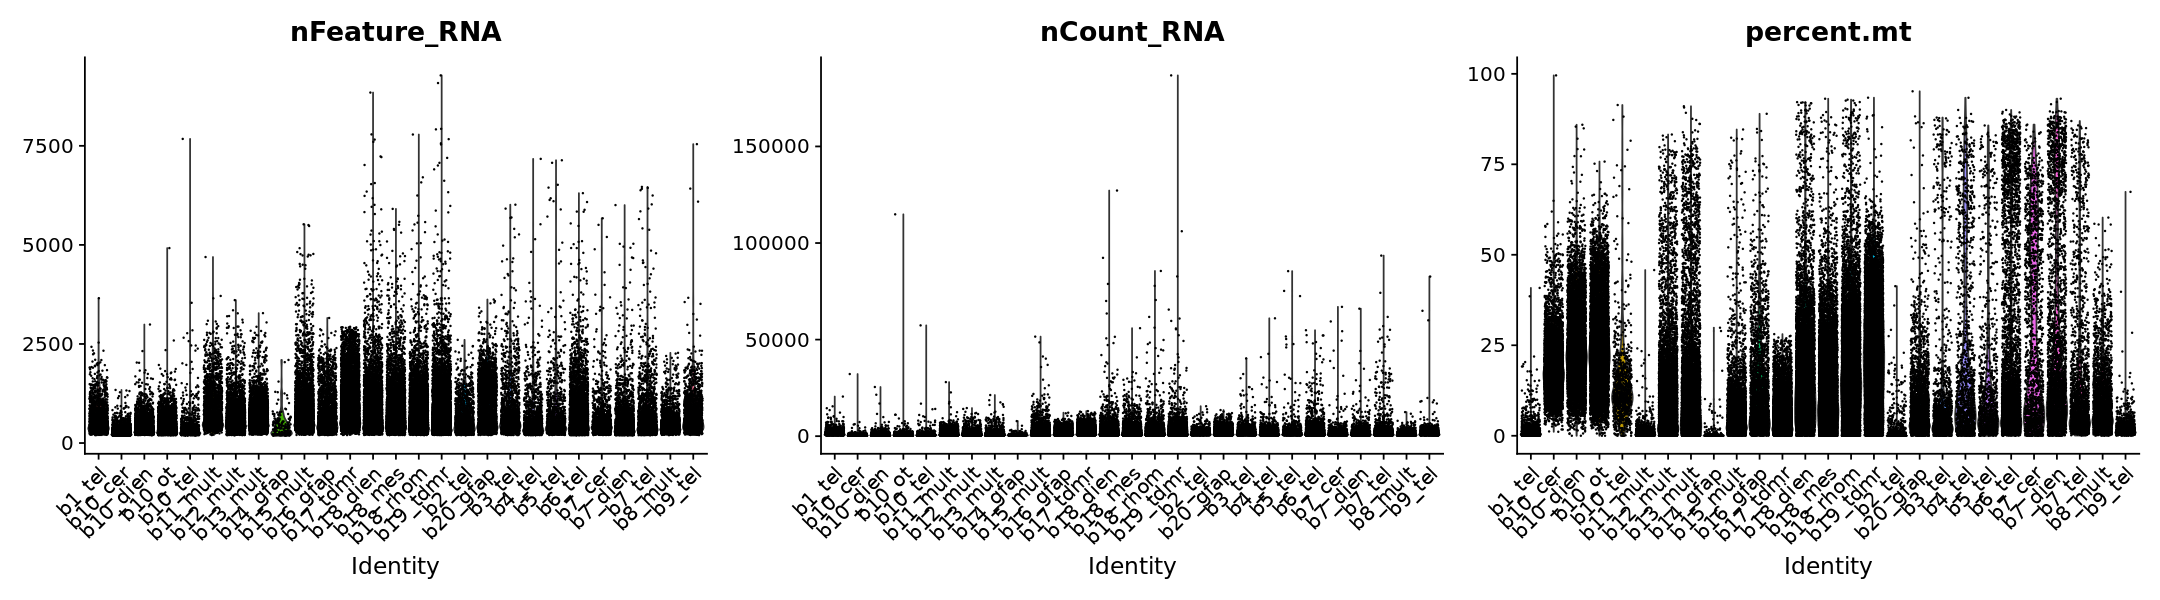

In [22]:
options(repr.plot.width=18, repr.plot.height=5)

qc_plot1 <- VlnPlot(object = brain_pool_in, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.05, group.by = "orig.ident")
qc_plot1

In [23]:
brain_pool_in <- subset(x = brain_pool_in, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & nCount_RNA <10000 & percent.mt < 25)

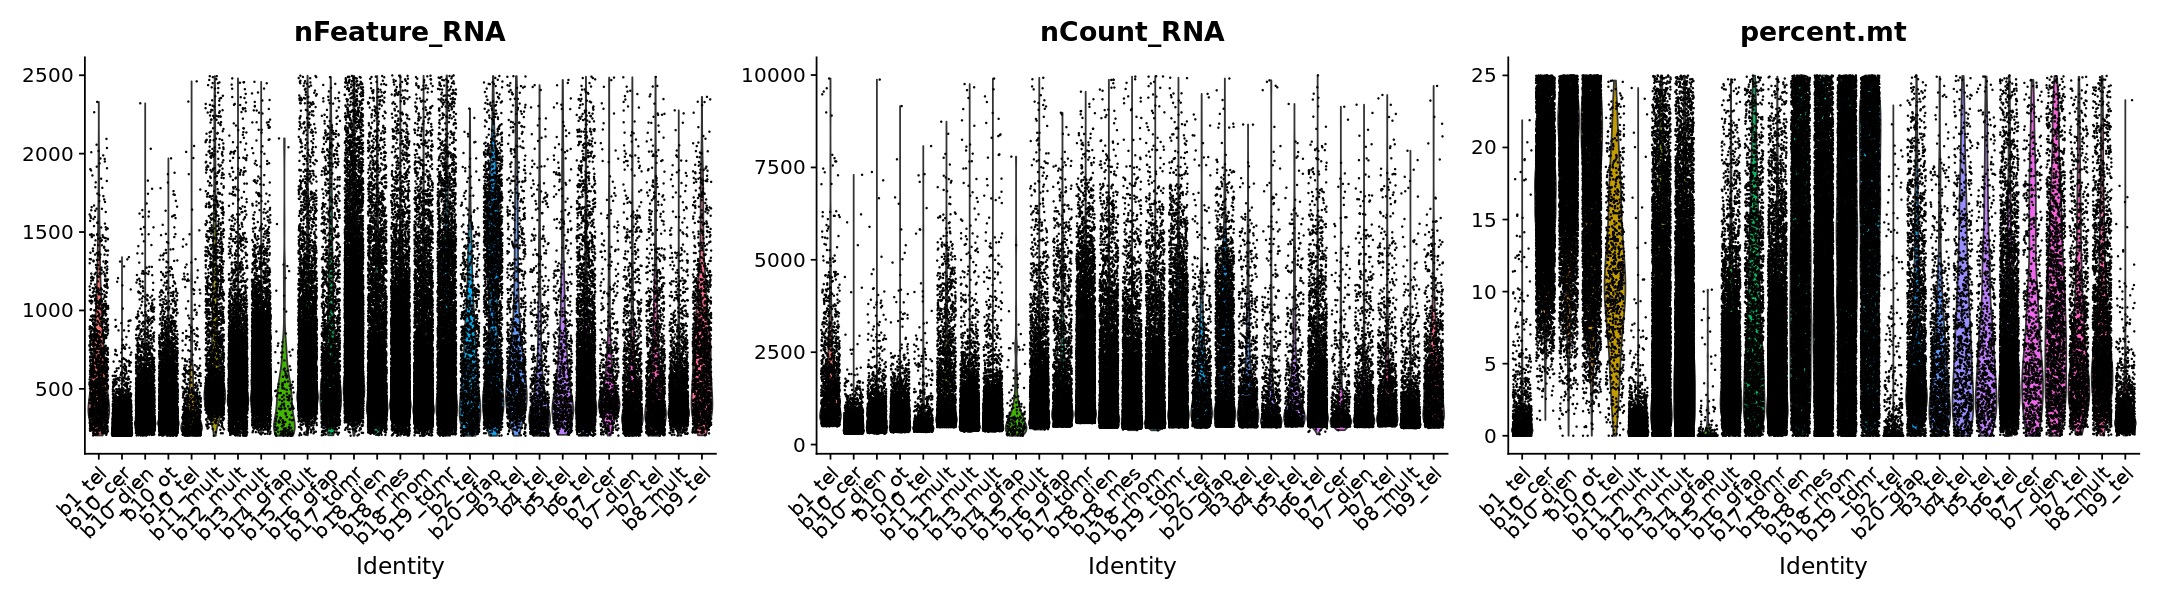

In [24]:
options(repr.plot.width=18, repr.plot.height=5)

qc_plot2 <- VlnPlot(object = brain_pool_in, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.05, group.by = "orig.ident")
qc_plot2

In [25]:
dim(brain_pool_in)

[1]  24332 113931

### Remove doublets with ScDblFinder

In [29]:
# make list of all individual datasets split by orig.ident
seurat_objects <- SplitObject(brain_pool_in, split.by = "orig.ident")

In [31]:
seurat_objects

$b1_tel
An object of class Seurat 
24332 features across 1491 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b2_tel
An object of class Seurat 
24332 features across 1218 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b3_tel
An object of class Seurat 
24332 features across 1210 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b4_tel
An object of class Seurat 
24332 features across 882 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b5_tel
An object of class Seurat 
24332 features across 749 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b6_tel
An object of class Seurat 
24332 features across 4740 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$b7_tel
An object of class Seurat 
24332 features across 1558 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)

$

In [32]:
#convert to sce format
sce_objects <- lapply(seurat_objects, as.SingleCellExperiment)

In [33]:
sce_objects

$b1_tel
class: SingleCellExperiment 
dim: 24332 1491 
metadata(0):
assays(2): counts logcounts
rownames(24332): mansc1 dusp16 ... si:dkey-19a16.1 htr2b
rowData names(0):
colnames(1491): B1.T_AAACATTGGAGCTT-1 B1.T_AAACGGCTTTCCAT-1 ...
  B1.T_TTTCCAGATTCTGT-1 B1.T_TTTGACTGCTTACT-1
colData names(9): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

$b2_tel
class: SingleCellExperiment 
dim: 24332 1218 
metadata(0):
assays(2): counts logcounts
rownames(24332): mansc1 dusp16 ... si:dkey-19a16.1 htr2b
rowData names(0):
colnames(1218): B2.T_AAACGCACACGCAT-1 B2.T_AAACTTGAAAAAGC-1 ...
  B2.T_TTTGACTGCTGATG-1 B2.T_TTTGCATGAGCCTA-1
colData names(9): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

$b3_tel
class: SingleCellExperiment 
dim: 24332 1210 
metadata(0):
assays(2): counts logcounts
rownames(24332): mansc1 dusp16 ... si:dkey-19a16.1 htr2b
rowData names(0):
colnames(1210): B3.T_AAACCTGGTCATACTG-1 

In [ ]:
scdbl_objects <- lapply(sce_objects, scDblFinder)

In [36]:
scdbl_objects[1]

$b1_tel
class: SingleCellExperiment 
dim: 24332 1491 
metadata(0):
assays(2): counts logcounts
rownames(24332): mansc1 dusp16 ... si:dkey-19a16.1 htr2b
rowData names(1): scDblFinder.selected
colnames(1491): B1.T_AAACATTGGAGCTT-1 B1.T_AAACGGCTTTCCAT-1 ...
  B1.T_TTTCCAGATTCTGT-1 B1.T_TTTGACTGCTTACT-1
colData names(13): orig.ident nCount_RNA ... scDblFinder.weighted
  scDblFinder.cxds_score
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):


In [37]:
seurat_dbrm_objects <- lapply(scdbl_objects ,as.Seurat)

In [38]:
seurat_dbrm_objects[1]

$b1_tel
An object of class Seurat 
24332 features across 1491 samples within 1 assay 
Active assay: RNA (24332 features, 0 variable features)


In [44]:
b1_tel <- seurat_dbrm_objects$b1_tel
b2_tel <- seurat_dbrm_objects$b2_tel
b3_tel <- seurat_dbrm_objects$b3_tel
b4_tel <- seurat_dbrm_objects$b4_tel
b5_tel <- seurat_dbrm_objects$b5_tel
b6_tel <- seurat_dbrm_objects$b6_tel

b7_cer <- seurat_dbrm_objects$b7_cer
b7_dien <- seurat_dbrm_objects$b7_dien
b7_tel <- seurat_dbrm_objects$b7_tel

b8_mult <- seurat_dbrm_objects$b8_mult

b9_tel <- seurat_dbrm_objects$b9_tel

b10_cer <- seurat_dbrm_objects$b10_cer
b10_dien <- seurat_dbrm_objects$b10_dien
b10_ot <- seurat_dbrm_objects$b10_ot
b10_tel <- seurat_dbrm_objects$b10_tel

b11_mult <- seurat_dbrm_objects$b11_mult
b12_mult <- seurat_dbrm_objects$b12_mult
b13_mult <- seurat_dbrm_objects$b13_mult

b14_gfap <- seurat_dbrm_objects$b14_gfap

b15_mult <- seurat_dbrm_objects$b15_mult

b16_gfap <- seurat_dbrm_objects$b16_gfap

b17_tdmr <- seurat_dbrm_objects$b17_tdmr

b18_dien <- seurat_dbrm_objects$b18_dien
b18_mes <- seurat_dbrm_objects$b18_mes
b18_rhom <- seurat_dbrm_objects$b18_rhom

b19_tdmr <- seurat_dbrm_objects$b19_tdmr

b20_gfap <- seurat_dbrm_objects$b20_gfap

In [45]:
str(b1_tel)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:977579] 13 18 28 30 64 121 131 197 217 237 ...
  .. .. .. .. .. ..@ p       : int [1:1492] 0 429 782 2304 3342 3572 3808 4632 4988 5640 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 24332 1491
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:24332] "mansc1" "dusp16" "crebl2" "gpr19" ...
  .. .. .. .. .. .. ..$ : chr [1:1491] "B1.T_AAACATTGGAGCTT-1" "B1.T_AAACGGCTTTCCAT-1" "B1.T_AAAGAGACGGATTC-1" "B1.T_AAAGAGACTAGACC-1" ...
  .. .. .. .. .. ..@ x       : num [1:977579] 0.96 0.996 0.995 0.998 1.998 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:977579] 13 18 28 30 64 

In [46]:
brain_pool_out <- merge(b1_tel, c(b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, 
                              b7_tel, b7_cer, b7_dien, b8_mult, b9_tel,
                              b10_tel, b10_ot, b10_cer, b10_dien, b11_mult,
                              b12_mult, b13_mult, b14_gfap, b15_mult, b16_gfap, 
                              b17_tdmr, b18_dien, b18_mes, b18_rhom, b19_tdmr, b20_gfap))

In [47]:
# select only singlets
brain_pool <- subset(brain_pool_out, subset = scDblFinder.class == "singlet")

In [48]:
dim(brain_pool)

[1]  24332 107598

In [49]:
table(brain_pool$scDblFinder.class)


singlet 
 107598 

In [50]:
# clean up memory
rm(b1_tel, b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, 
    b7_tel, b7_cer, b7_dien, b8_mult, b9_tel,
    b10_tel, b10_ot, b10_cer, b10_dien, b11_mult,
    b12_mult, b13_mult, b14_gfap, b15_mult, b16_gfap, 
    b17_tdmr, b18_dien, b18_mes, b18_rhom, b19_tdmr, b20_gfap)
rm(brain_pool_in, seurat_objects, sce_objects, seurat_dbrm_objects, brain_pool_out)

### Clustering with regression of technical covariates

In [51]:
brain_pool <- NormalizeData(object = brain_pool, normalization.method = "LogNormalize", scale.factor = 1e4)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 66 rows containing missing values (geom_point).”


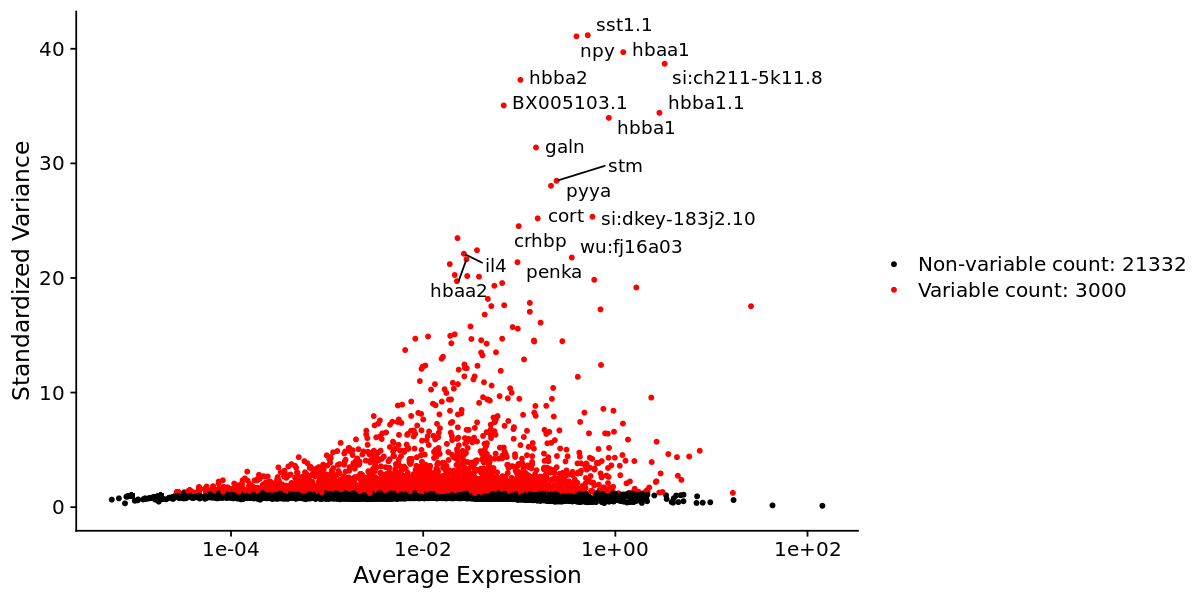

In [53]:
options(repr.plot.width=10, repr.plot.height=5)

#brain_pool <- FindVariableFeatures(object = brain_pool, selection.method = 'vst', nfeatures = 3000)

#plot variable features with top vargenes labeled
#top20 <- head(x = VariableFeatures(object = brain_pool), 20)
#plot_var_feat <- LabelPoints(plot = VariableFeaturePlot(object = brain_pool), points = top20, repel = TRUE)
plot_var_feat

In [ ]:
all.genes <- rownames(x = brain_pool)
brain_pool <- ScaleData(object = brain_pool, features = all.genes, vars.to.regress = c("nFeature_RNA","nCount_RNA","percent.mt"))

Regressing out nFeature_RNA, nCount_RNA, percent.mt



PC_ 1 
Positive:  cldnk, mpz, plp1b, csrp1b, cd9b, si:dkey-200l5.4, si:ch73-335m24.2, cx27.5, cd59, PLA1A 
	   cdaa, ly75, flj13639, si:dkey-164f24.2, ppp1r14aa, si:rp71-19m20.1, fabp2, si:ch211-286c4.6, ugt8, si:dkeyp-73d8.8 
	   crp1, elovl1b, wnk4b, glipr2l, timd4, myrf, cx47.1, tlcd1, BX000438.1, olig2 
Negative:  b2m, CR318588.4, junba, zgc:162730, fosab, si:busm1-266f07.2, cd74b, cebpb, mcl1a, cd74a 
	   mdkb, lgals3bpb, jdp2b, cx43, sat1a.2, ccl35.1, zgc:158343, tspan36, zgc:64051, si:ch211-212k18.7 
	   junbb, ms4a17a.10, fcer1gl, ctss2.2, si:dkey-27i16.2, ifi30, egr1, BX901920.1, slc1a2b, ptgdsb.2 
PC_ 2 
Positive:  fabp7a, slc1a2b, atp1b4, ptgdsb.2, cx43, atp1a1b, crtac1a, mdka, zgc:165461, mfge8a 
	   mdkb, ptn, s100b, si:ch211-66e2.5, slc4a4a, notch3, s1pr1, ndrg3a, gpm6bb, her4.1 
	   cyp4t8, ptgdsb.1, her4.2, sparc, elovl2, id1, eno1b, gstp1, msi1, si:ch211-251b21.1 
Negative:  si:busm1-266f07.2, cd74b, cd74a, lgals3bpb, ccl35.1, ms4a17a.10, ctss2.2, zgc:64051, pfn1, BX90

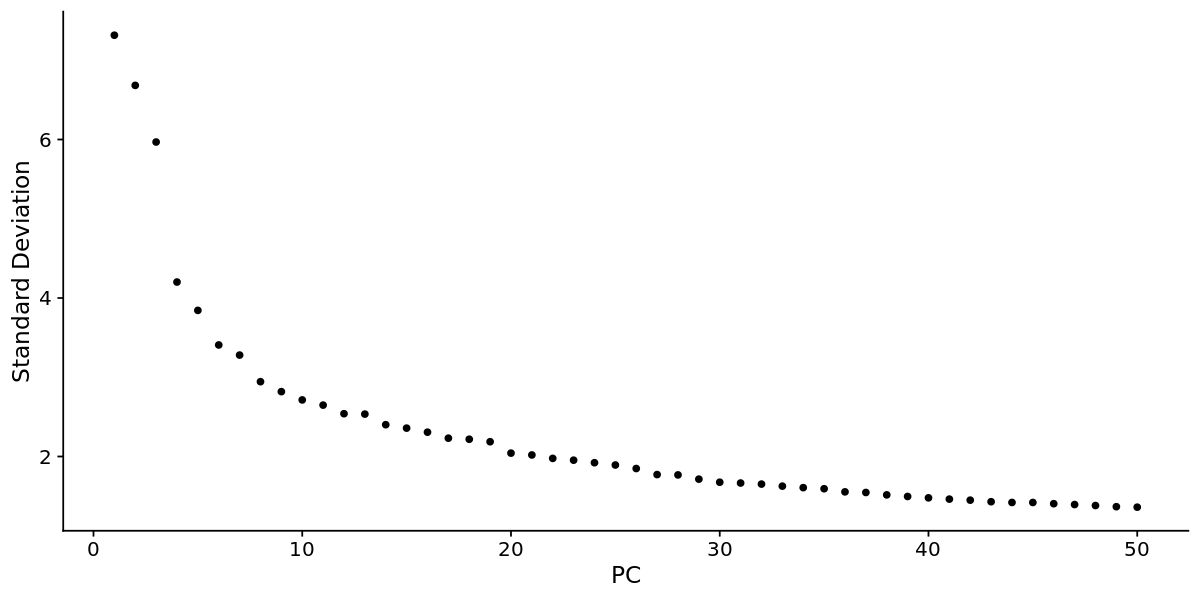

In [56]:
brain_pool <- RunPCA(object = brain_pool)

ElbowPlot(object = brain_pool, ndims = 50)

In [70]:
brain_pool <- FindNeighbors(brain_pool, dims = 1:28, verbose = FALSE)
brain_pool <- FindClusters(brain_pool, resolution = 0.6, verbose = FALSE)

brain_pool <- RunUMAP(brain_pool, dims = 1:28, verbose = FALSE)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



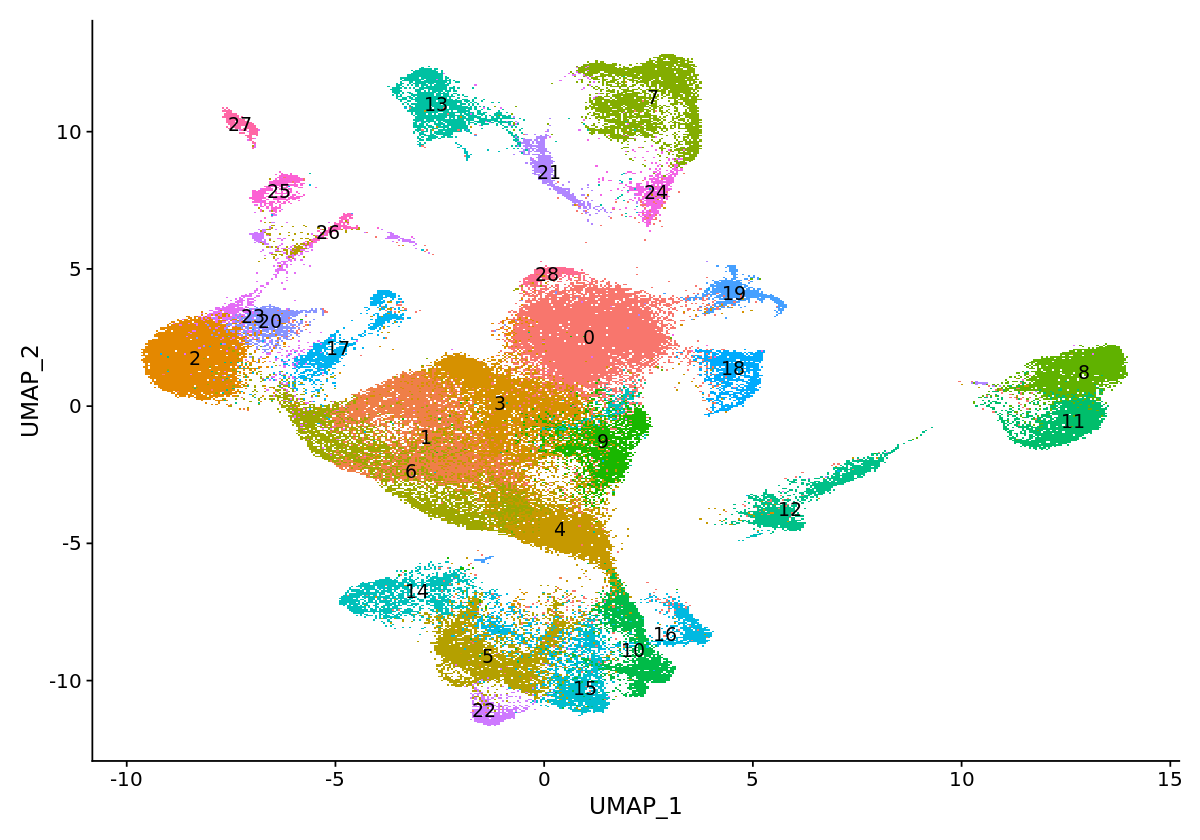

In [71]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(brain_pool, label = TRUE) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



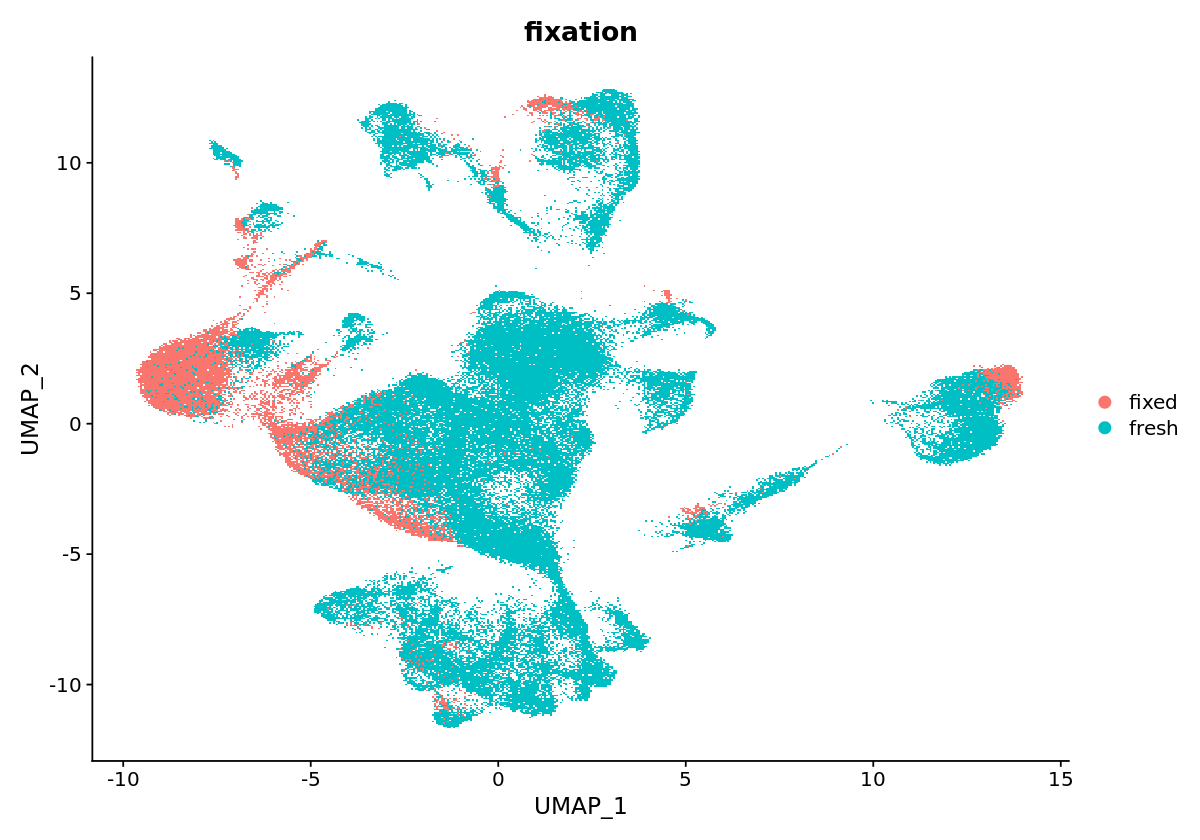

In [72]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(brain_pool, group.by = "fixation")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



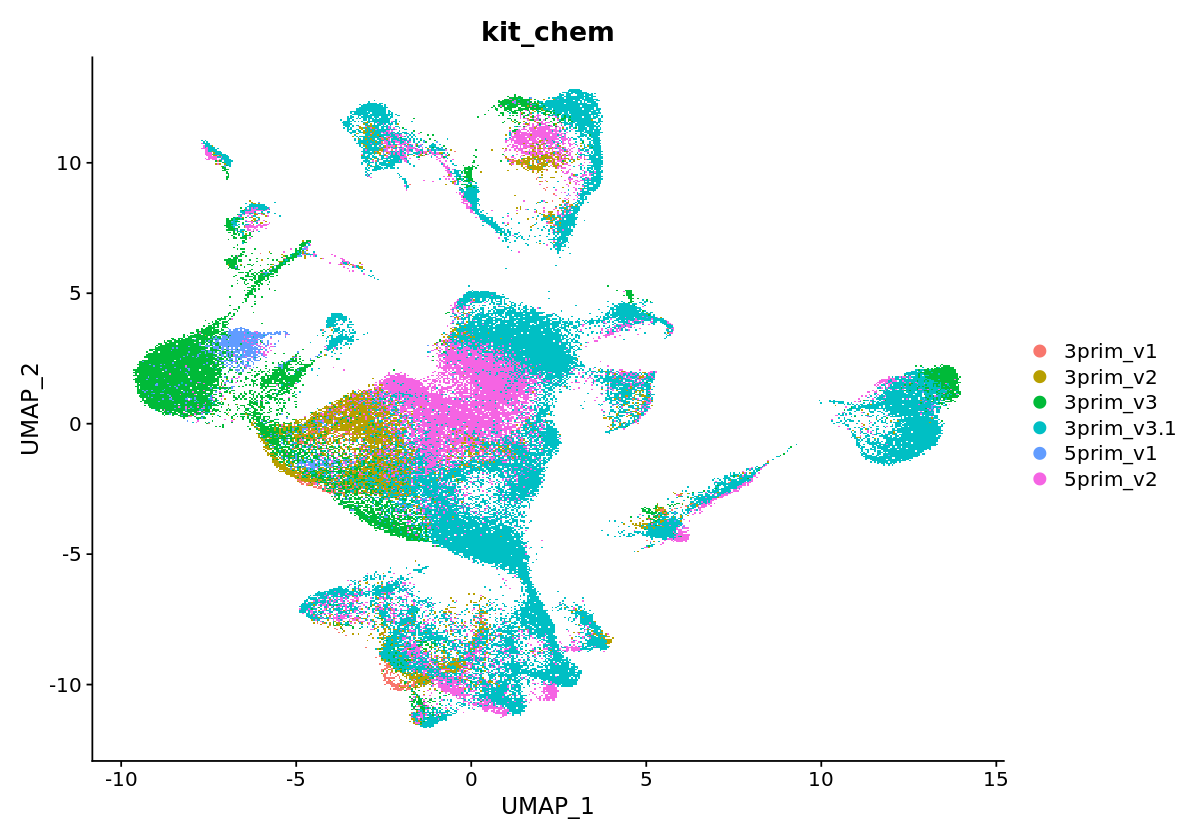

In [73]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(brain_pool, group.by = "kit_chem")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



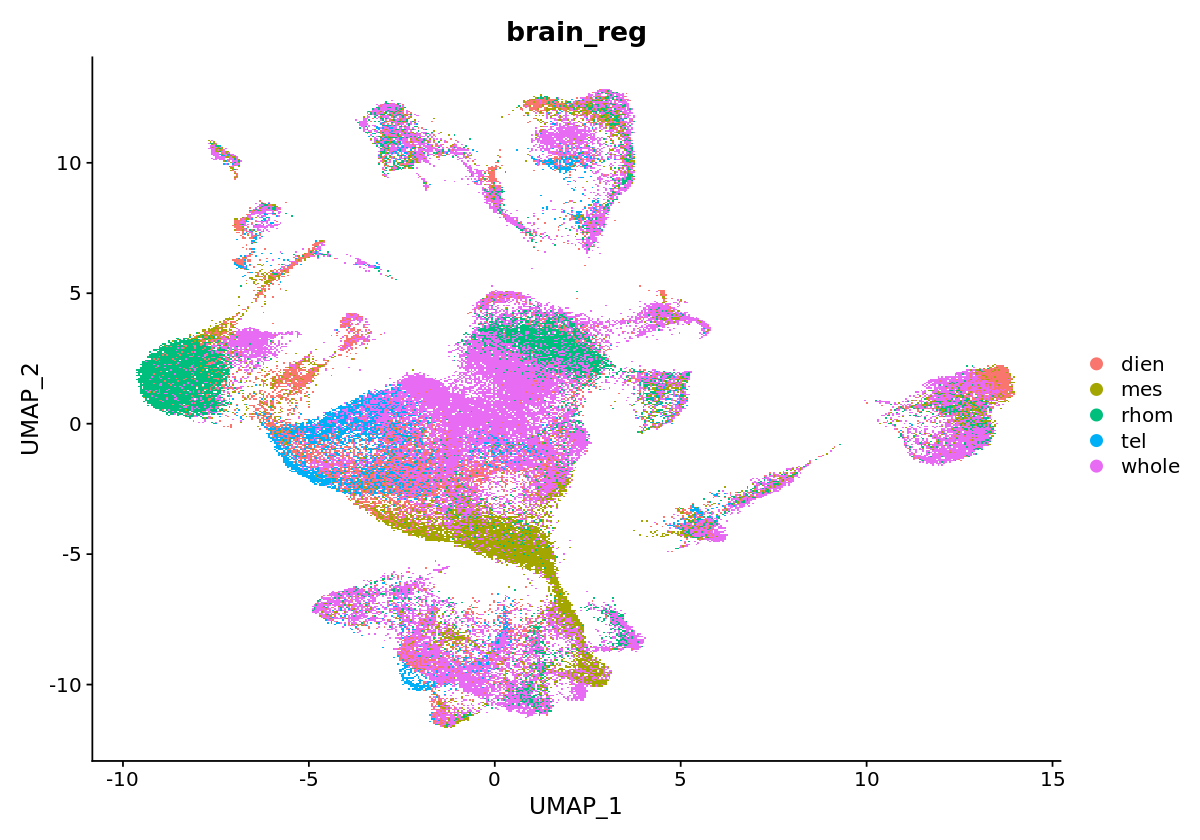

In [74]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(brain_pool, group.by = "brain_reg")

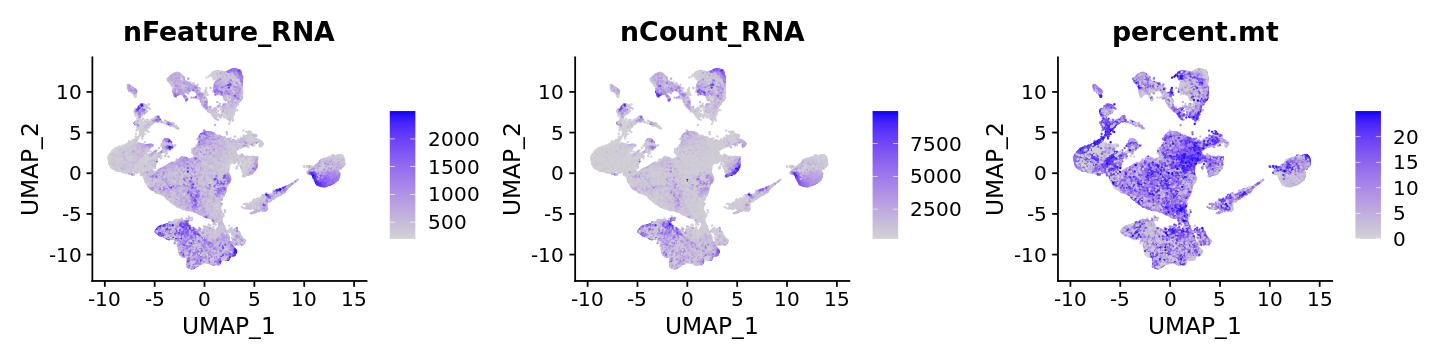

In [75]:
options(repr.plot.width=12, repr.plot.height=3)

FeaturePlot(brain_pool, features = c("nFeature_RNA","nCount_RNA","percent.mt"), ncol = 3, raster = FALSE)

In [ ]:
#stacked violin plot - good way to visualize markers later on 
#VlnPlot(brain_pool, features = c("nFeature_RNA","nCount_RNA","percent.mt"), stack = TRUE, flip = TRUE)

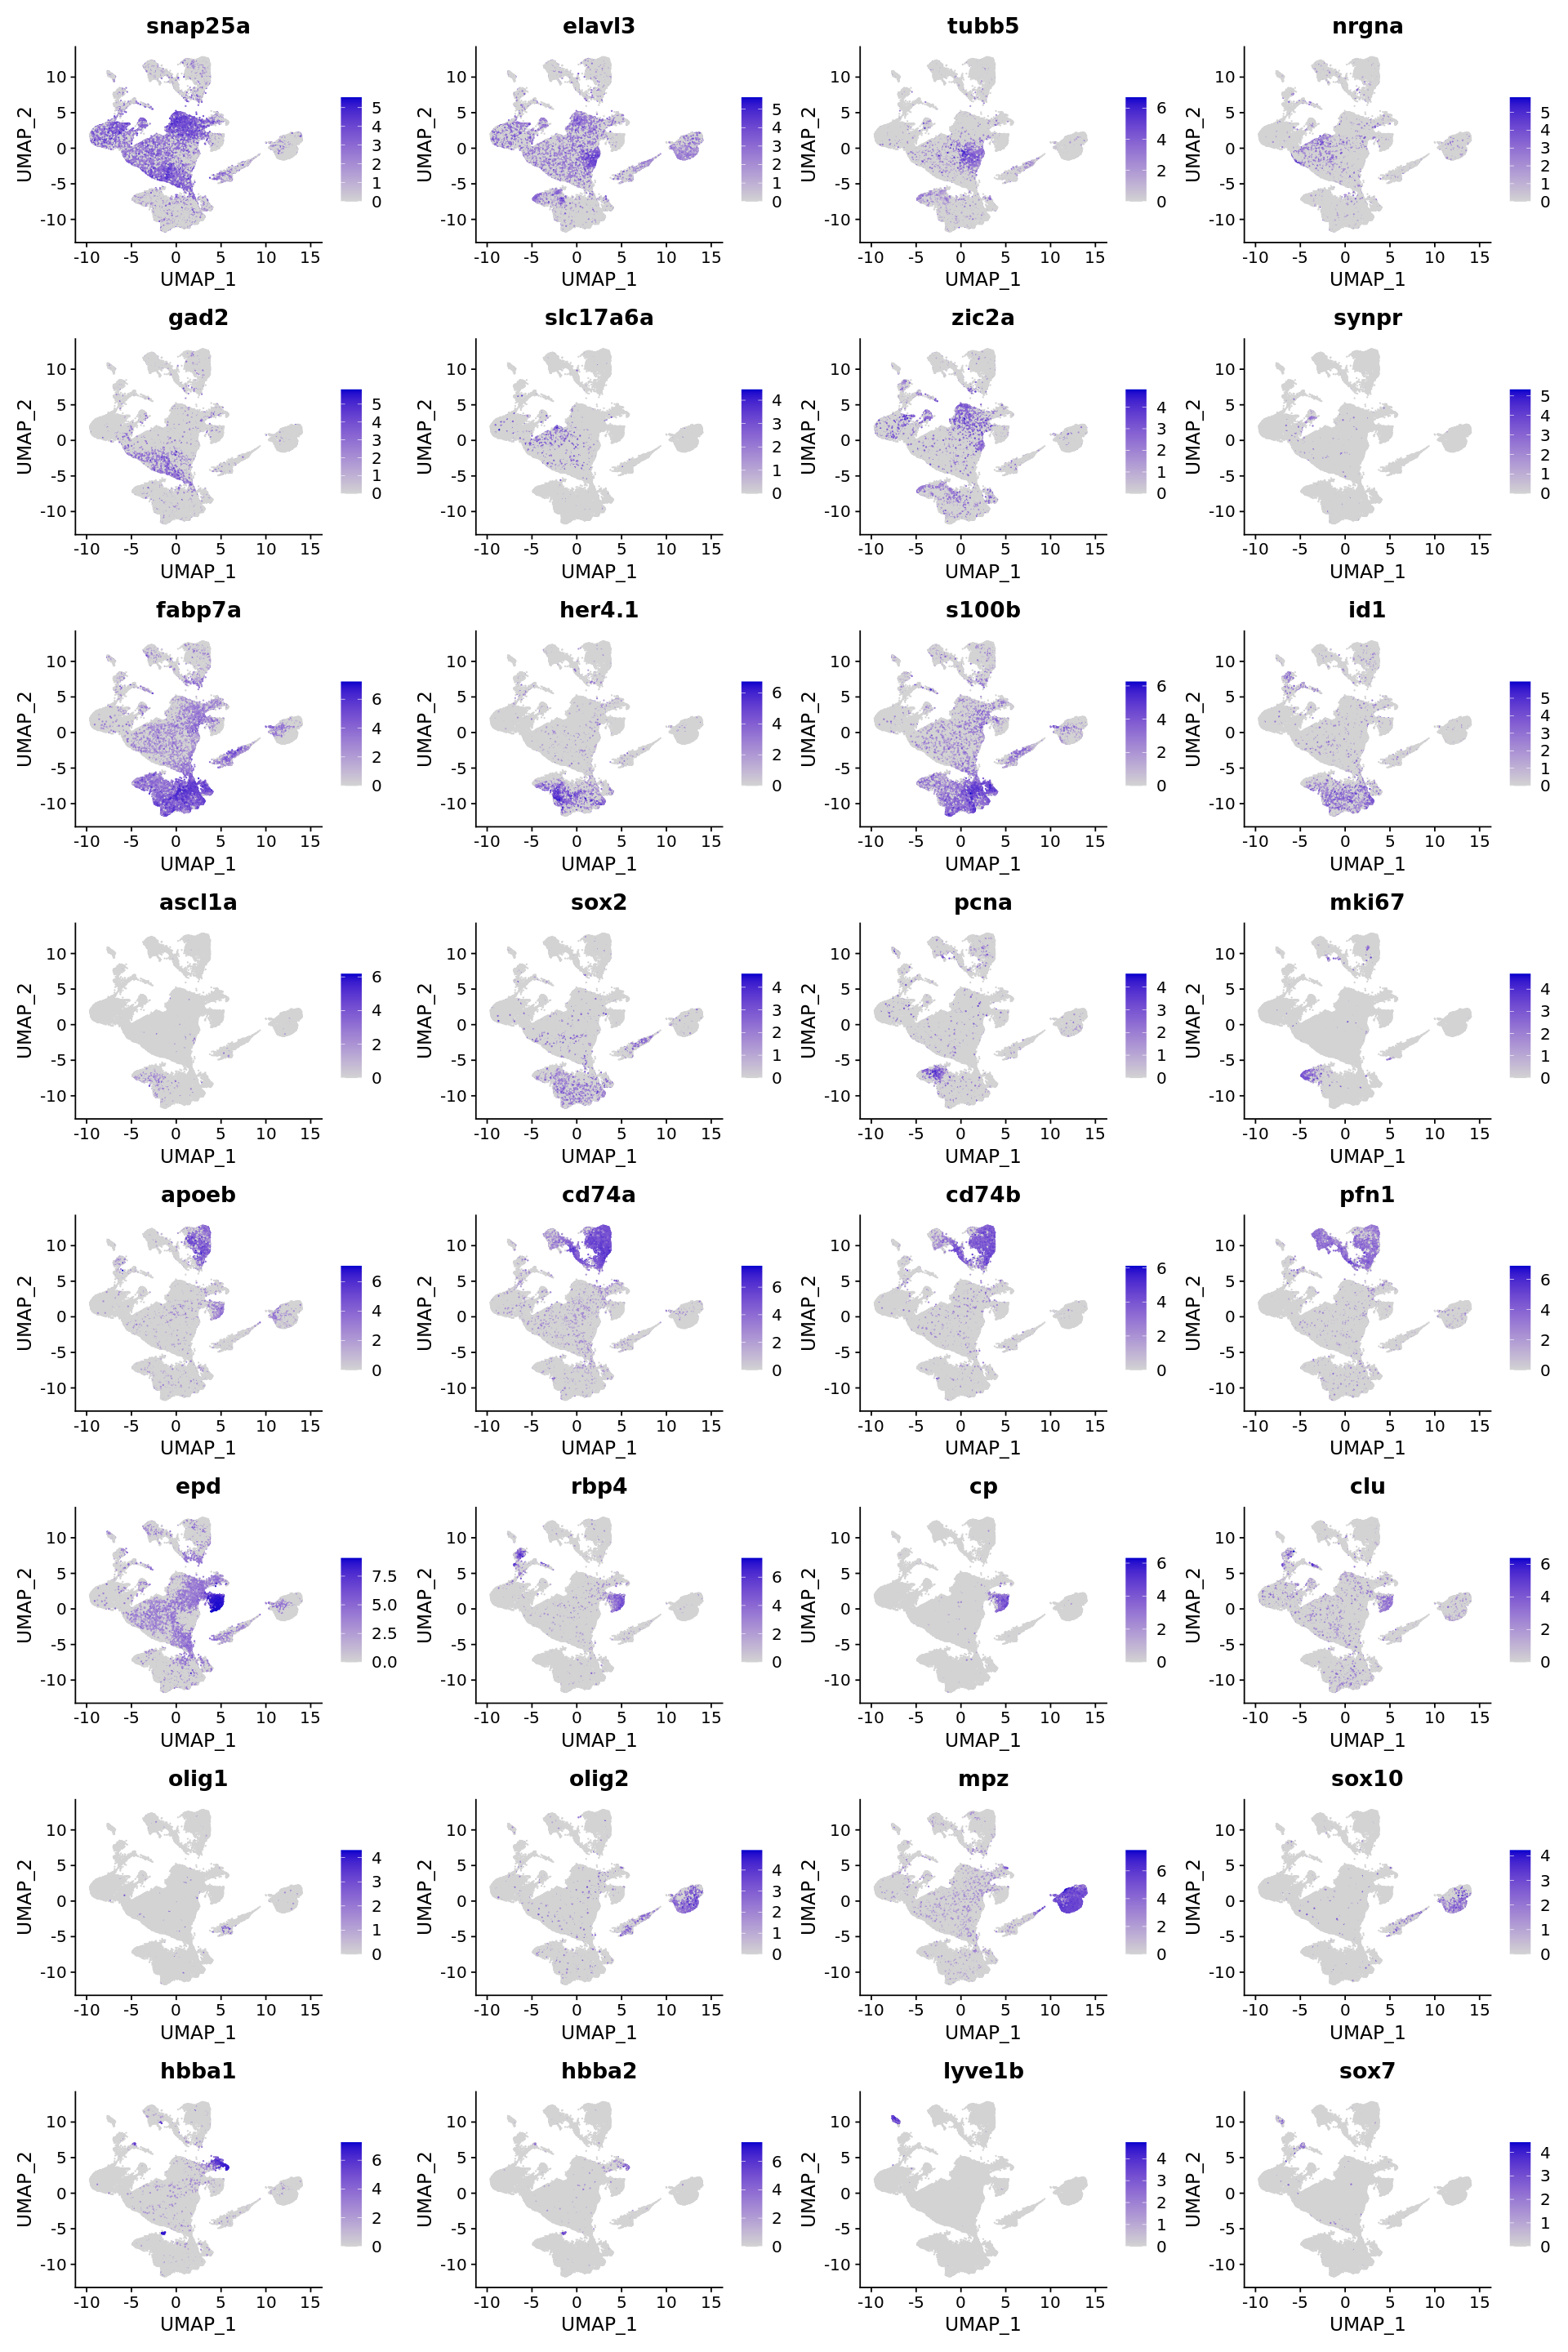

In [76]:
options(repr.plot.width=16, repr.plot.height=24)

FeaturePlot(object = brain_pool, reduction = 'umap', features = c("snap25a", "elavl3", "tubb5", "nrgna", 
                                                                 "gad2", "slc17a6a", "zic2a", "synpr",
                                                                 "fabp7a", "her4.1", "s100b", "id1",
                                                                 "ascl1a", "sox2", "pcna", "mki67",
                                                                 "apoeb", "cd74a", "cd74b", "pfn1",
                                                                 "epd", "rbp4", "cp", "clu",
                                                                 "olig1", "olig2", "mpz", "sox10",
                                                                 "hbba1", "hbba2", "lyve1b", "sox7"
                                                                 ), ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)


### Annotate major cell types

In [82]:
# find markers
#brain_pool.markers.bimod <- FindAllMarkers(object = brain_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
#brain_pool.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(brain_pool.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/brain_pool_28pcs_res0-6_markers_bimod.csv")

In [4]:
brain_pool.markers.bimod <- read.csv(file = "/local/Nina/jupyterlab/brains_trans/brain_pool_28pcs_res0-6_markers_bimod.csv")

In [7]:
# get genes from single cluster in desc fold change order
genes.single.cluster.bimod <- function(x, markerlist){
  genes.only <- markerlist %>% filter (cluster ==x ) %>% arrange(desc(avg_log2FC)) %>% select(gene)
}

Idents(brain_pool) <- "brain_pool_num_pc28_res0.6"

# get genes for each cluster 
for (cluster in levels(brain_pool@active.ident)) {
  genelist.cluster <- genes.single.cluster.bimod(cluster, brain_pool.markers.bimod)
  genelist.cluster <- genelist.cluster$gene
  topgenes <- head(genelist.cluster, 20)
  assign(paste0("cluster",cluster, "_top20"), topgenes)
}

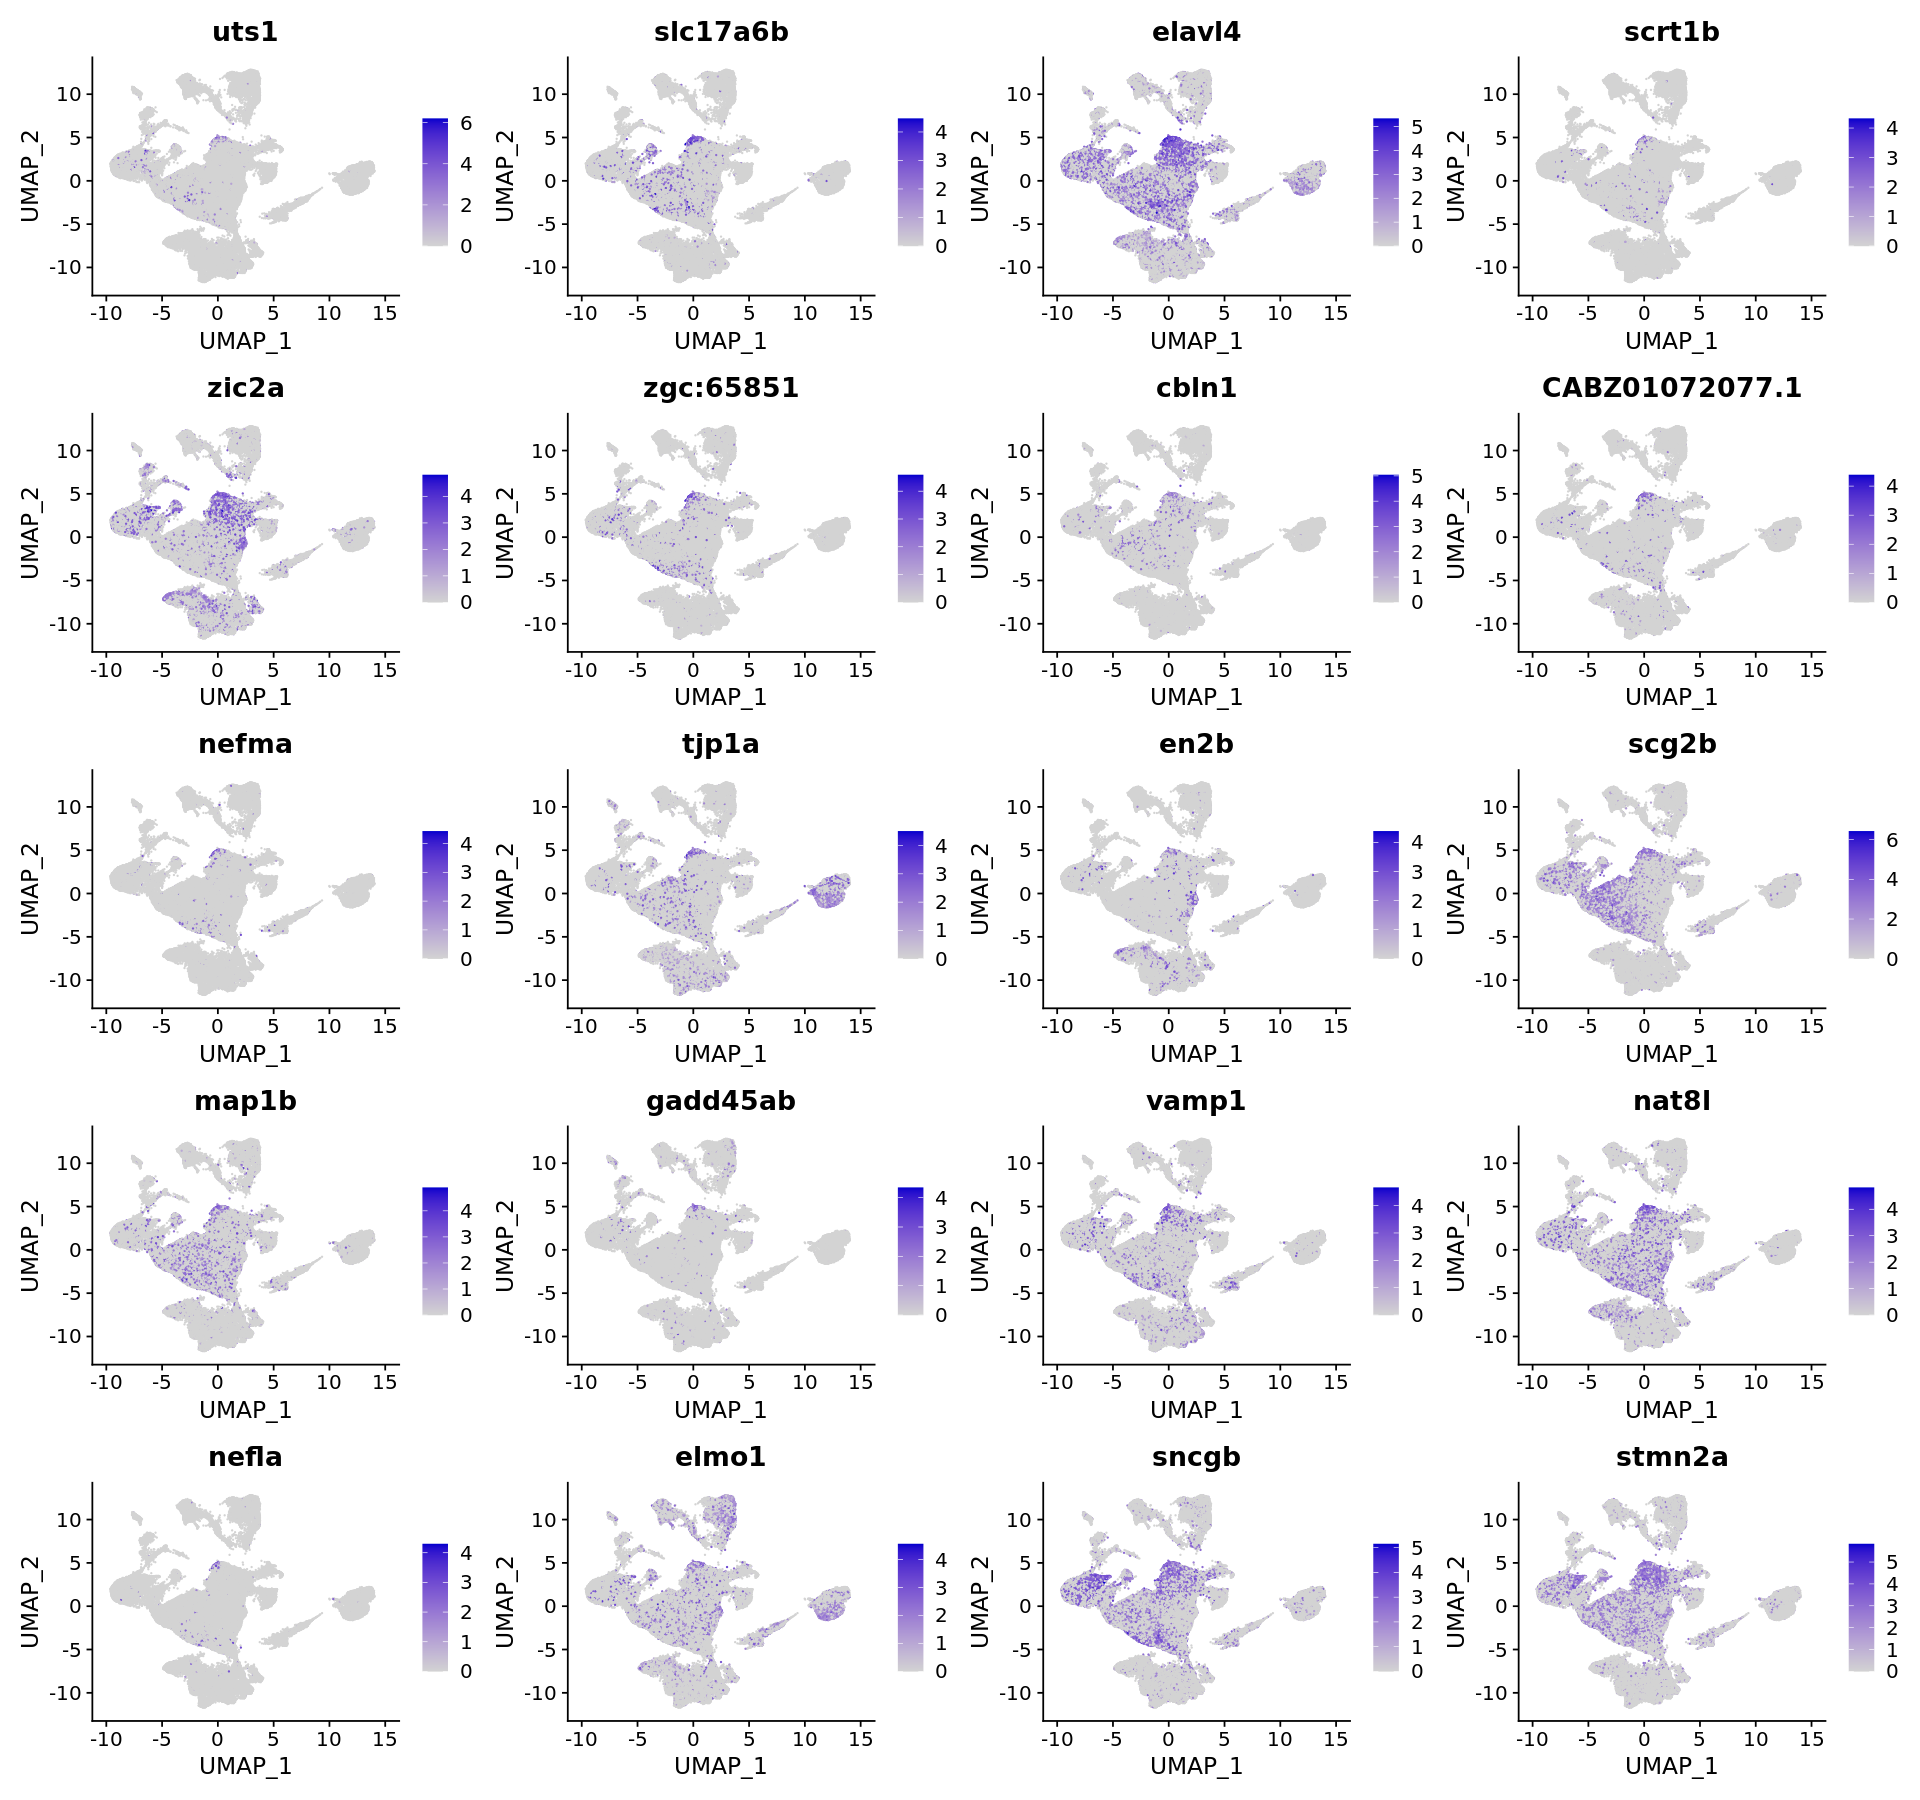

In [36]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = brain_pool, reduction = 'umap', features = cluster28_top20, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

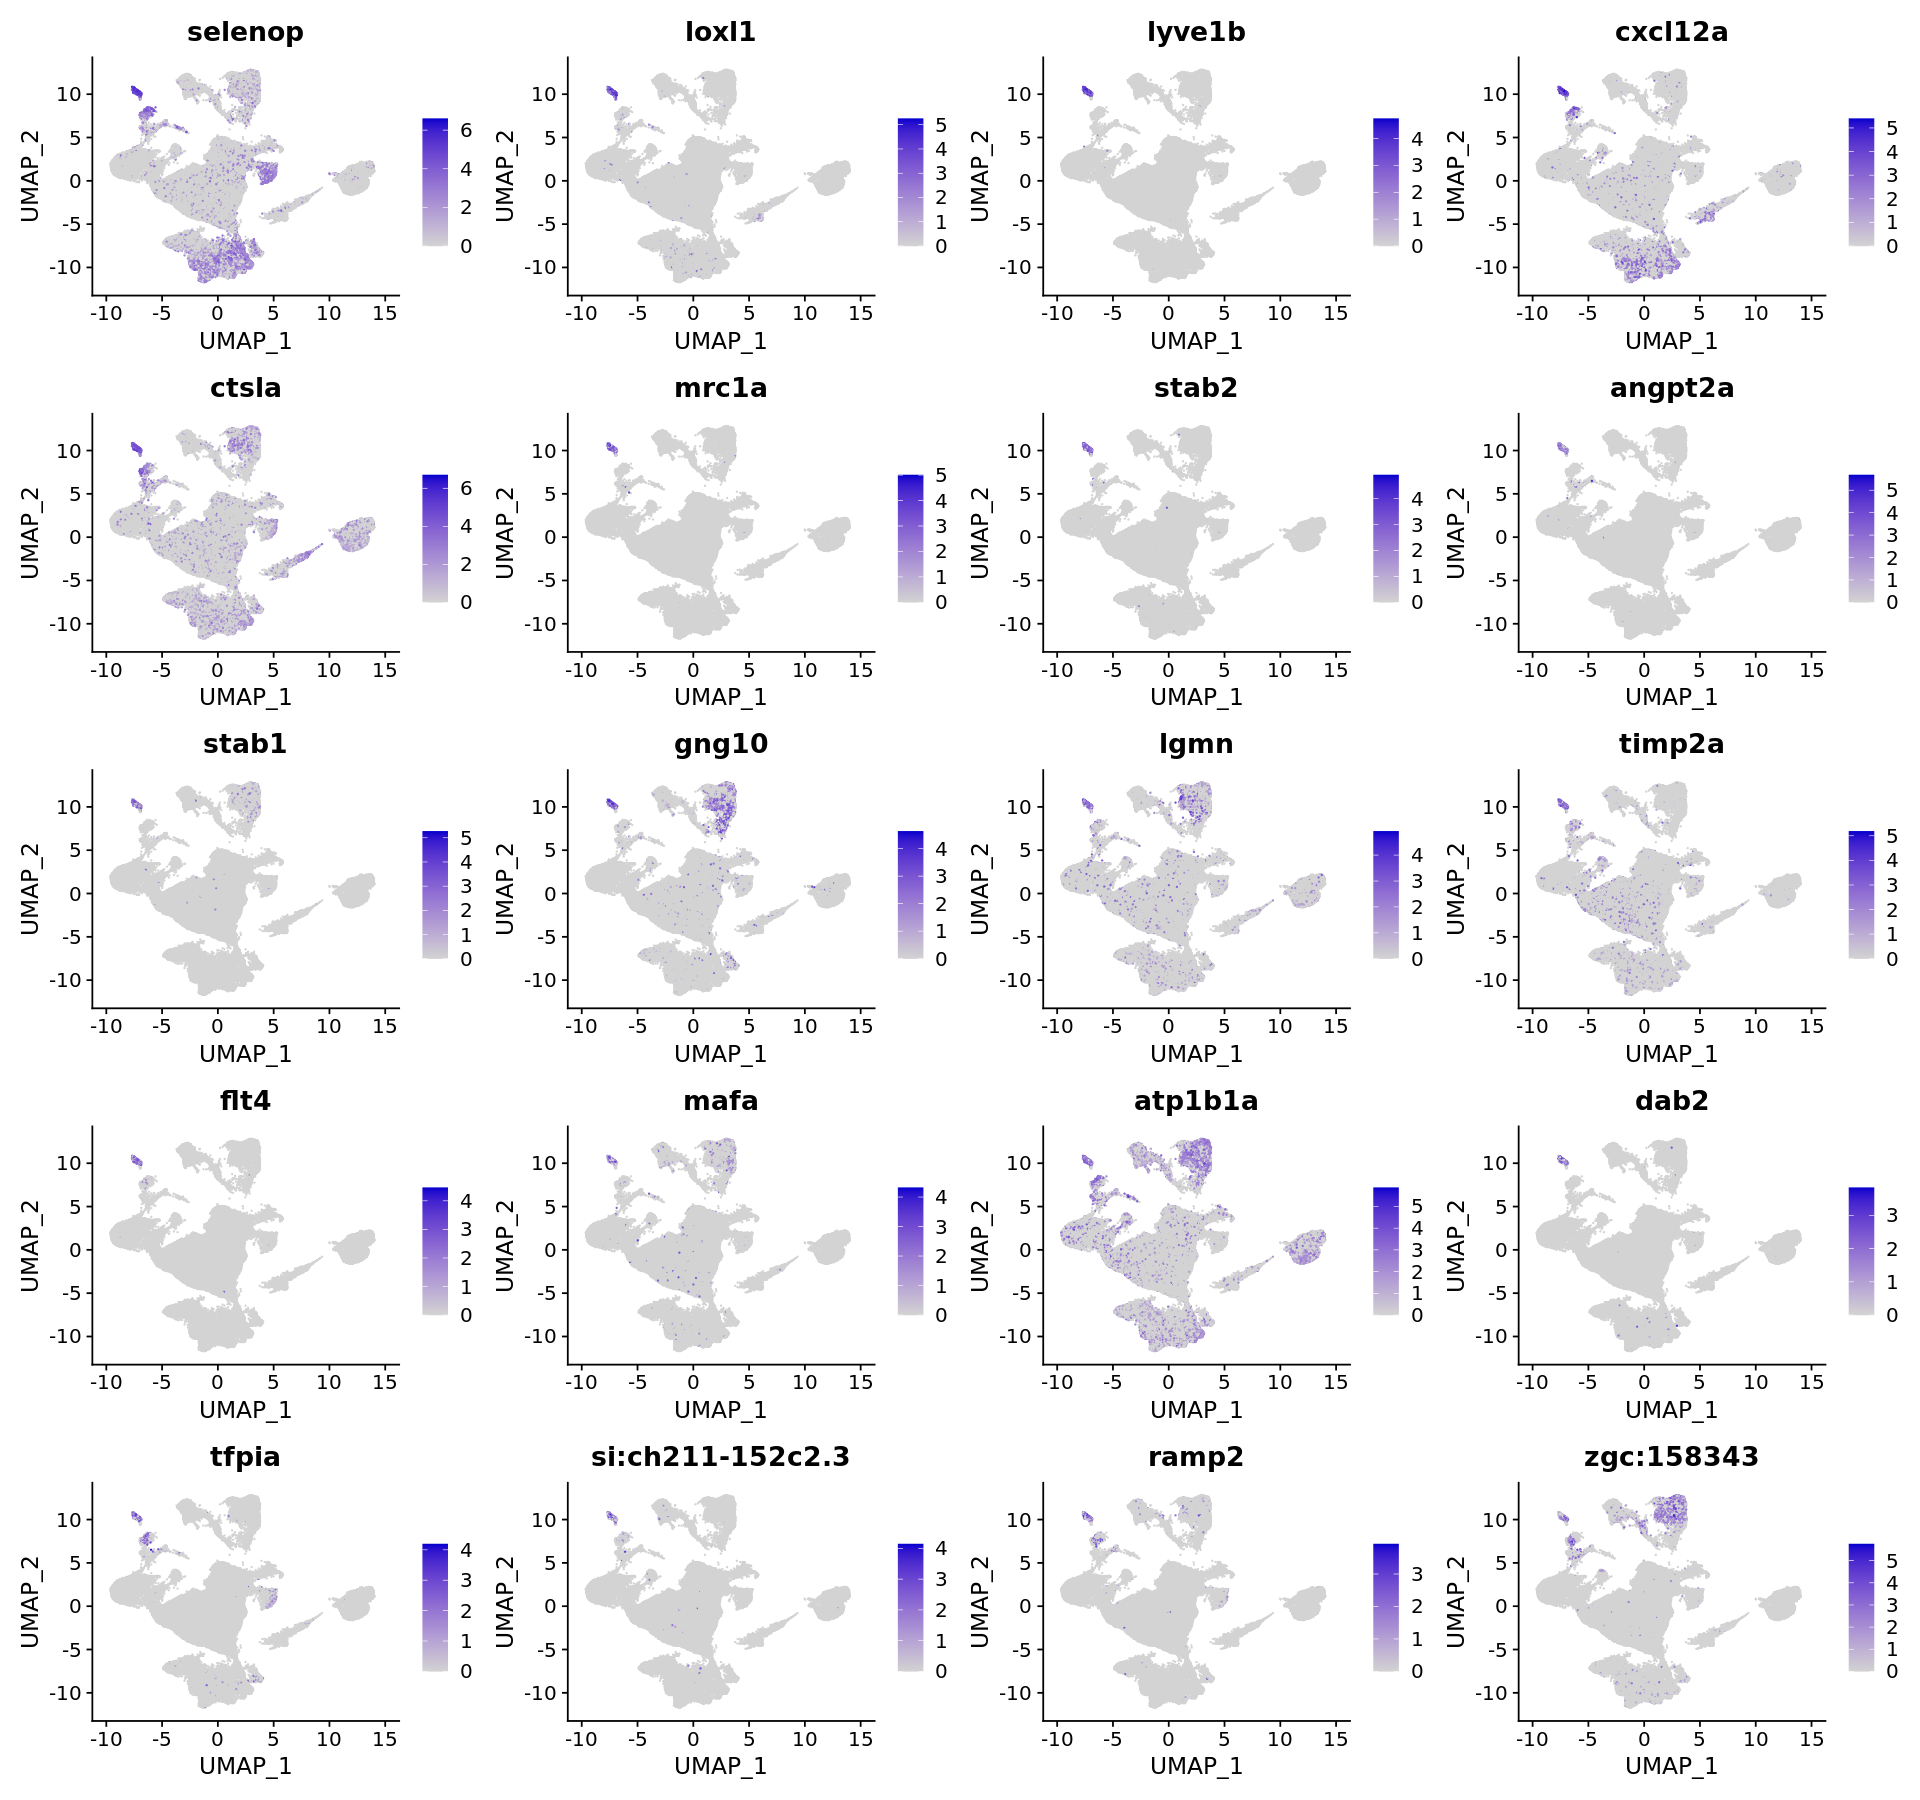

In [34]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = brain_pool, reduction = 'umap', features = cluster27_top20, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

In [89]:
#save numeric identities as separate slot (to have them as comparison in  subsetted object)
brain_pool$brain_pool_num_pc28_res0.6 <- brain_pool@active.ident

In [3]:
# reload numeric ids (for renaming)
Idents(brain_pool) <- "brain_pool_num_pc28_res0.6"

In [4]:
table(brain_pool@active.ident)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
15655 10511  8614  8146  7471  5534  5423  5321  4899  3960  3303  3147  2903 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 2809  2519  2020  1893  1827  1645  1575  1270  1206  1118  1115   898   770 
   26    27    28 
  754   702   590 

In [5]:
brain_pool <- RenameIdents(object = brain_pool, 
                        "0" = "Neurons",
                         "1" = "Neurons",
                         "2" = "Neurons",
                         "3" = "Neurons",
                         "4" = "Neurons",
                         "5" = "Radial glia",
                         "6" = "Neurons",
                         "7" = "Immune cells",
                         "8" = "Oligodendroglia",
                         "9" = "Neurons",
                         "10" = "Radial glia",
                         "11" = "Oligodendroglia",
                         "12" = "Oligodendroglia",
                         "13" = "Immune cells",
                         "14" = "Radial glia",
                         "15" = "Radial glia",
                         "16" = "Radial glia",
                         "17" = "Neurons",
                         "18" = "Ependymal cells",
                         "19" = "Erythrocytes",
                        "20" = "Neurons",
                        "21" = "Immune cells",
                        "22" = "Radial glia",
                        "23" = "Neurons",
                        "24" = "Immune cells", 
                        "25" = "Epithelial cells",
                        "26" = "Epithelial cells",
                        "27" = "Endothelial cells",
                        "28" = "Neurons")

# update on 27.07.22: clusters 25 and 26 given final name "Epithelial" (formerly "Other")
# there is still some ambiguity about both of these clusters but shared expression of keratins (krt18, krt8) strongly indicates epithelial identity

#stash
brain_pool[["major_celltypes_pc28_res0.6"]] <- Idents(object = brain_pool)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



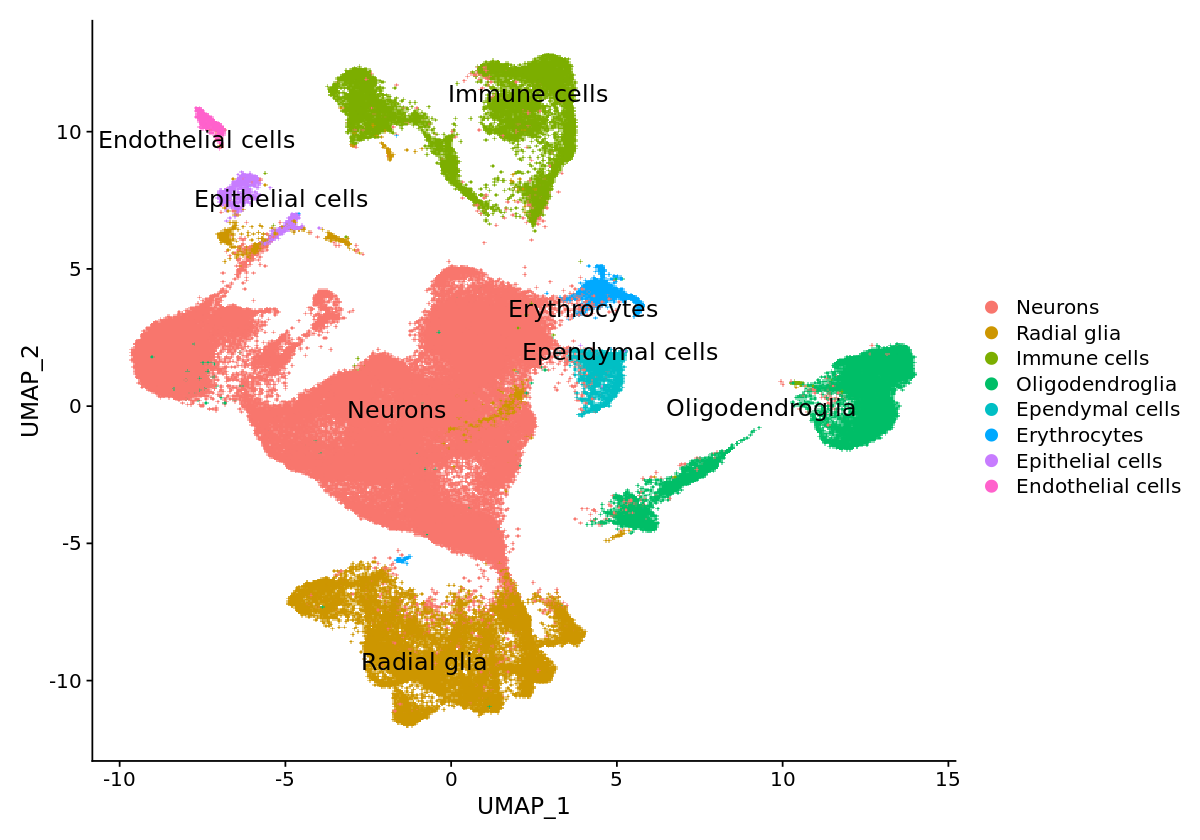

In [6]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(object = brain_pool, reduction = 'umap', label = TRUE, label.size = 5, pt.size = 0.6, repel = TRUE)

In [7]:
table(brain_pool$major_celltypes_pc28_res0.6)


          Neurons       Radial glia      Immune cells   Oligodendroglia 
            64582             16387             10234             10949 
  Ependymal cells      Erythrocytes  Epithelial cells Endothelial cells 
             1645              1575              1524               702 

### Save full dataset and subsets

In [ ]:
saveRDS(brain_pool, file = "/local/Nina/jupyterlab/brains_trans/brain_pool_corr_reg.rds")

In [3]:
#read back in
brain_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/brain_pool_corr_reg.rds")

In [100]:
#if idents are not already set to major ID do it now before subsetting
neu_pool <- subset(brain_pool, idents = c("Neurons"))
rg_pool <- subset(brain_pool, idents = c("Radial glia"))
imm_pool <- subset(brain_pool, idents = c("Immune cells"))
ogd_pool <- subset(brain_pool, idents = c("Oligodendroglia"))
rest_pool <- subset(brain_pool, idents = c("Ependymal cells", "Endothelial cells", "Erythrocytes", "Other"))

In [ ]:
saveRDS(neu_pool, file = "/local/Nina/jupyterlab/brains_trans/neu_pool_in.rds")
saveRDS(rg_pool, file = "/local/Nina/jupyterlab/brains_trans/rg_pool_in.rds")
saveRDS(imm_pool, file = "/local/Nina/jupyterlab/brains_trans/imm_pool_in.rds")
saveRDS(ogd_pool, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_in.rds")
saveRDS(rest_pool, file = "/local/Nina/jupyterlab/brains_trans/rest_pool_in.rds")


### Markers on level of major cell types

For the purpose of plots for the paper, I also want to see which markers are most representative on the level of major cell type (rather than cluster).

In [4]:
Idents(brain_pool) <- "major_celltypes_pc28_res0.6"

In [5]:
# find markers
brain_pool.mct.markers.bimod <- FindAllMarkers(object = brain_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
brain_pool.mct.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(brain_pool.mct.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/brain_pool_mct_28pcs_res0-6_markers_bimod.csv")

Calculating cluster Neurons

Calculating cluster Radial glia

Calculating cluster Immune cells

Calculating cluster Oligodendroglia

Calculating cluster Ependymal cells

Calculating cluster Erythrocytes

Calculating cluster Other

Calculating cluster Endothelial cells



p_val avg_log2FC pct.1 pct.2 p_val_adj cluster           gene           
1  0     2.797123   0.390 0.105 0         Neurons           atp1b1b        
2  0     2.434632   0.724 0.283 0         Neurons           snap25a        
3  0     4.191606   0.430 0.047 0         Radial glia       her4.1         
4  0     4.104720   0.661 0.111 0         Radial glia       slc1a2b        
5  0     5.534195   0.871 0.136 0         Immune cells      cd74a          
6  0     4.710761   0.638 0.193 0         Immune cells      apoc1          
7  0     6.473226   0.816 0.136 0         Oligodendroglia   plp1b          
8  0     6.116938   0.800 0.179 0         Oligodendroglia   cd59           
9  0     7.710931   0.995 0.294 0         Ependymal cells   epd            
10 0     6.631039   0.992 0.173 0         Ependymal cells   ggctb          
11 0     9.011638   0.997 0.085 0         Erythrocytes      hbba1.1        
12 0     8.836165   0.997 0.102 0         Erythrocytes      si:ch211-5k11.8
13 0     5.316132   0.487 0.043 0         Other             wu:fj16a03     
14 0     4.230931   0.455 0.024 0         Other             rgcc           
15 0     5.199564   0.967 0.195 0         Endothelial cells selenop        
16 0     5.064556   0.915 0.009 0         Endothelial cells loxl1

In [10]:
# get genes from single cluster in desc fold change order
genes.single.cluster.bimod <- function(x, markerlist){
  genes.only <- markerlist %>% filter (cluster ==x ) %>% arrange(desc(avg_log2FC)) %>% select(gene)
}

# get genes for each cluster 
for (cluster in levels(brain_pool@active.ident)) {
  genelist.cluster <- genes.single.cluster.bimod(cluster, brain_pool.mct.markers.bimod)
  genelist.cluster <- genelist.cluster$gene
  topgenes <- head(genelist.cluster, 40)
  assign(paste0("cluster_",cluster, "_top40"), topgenes)
}

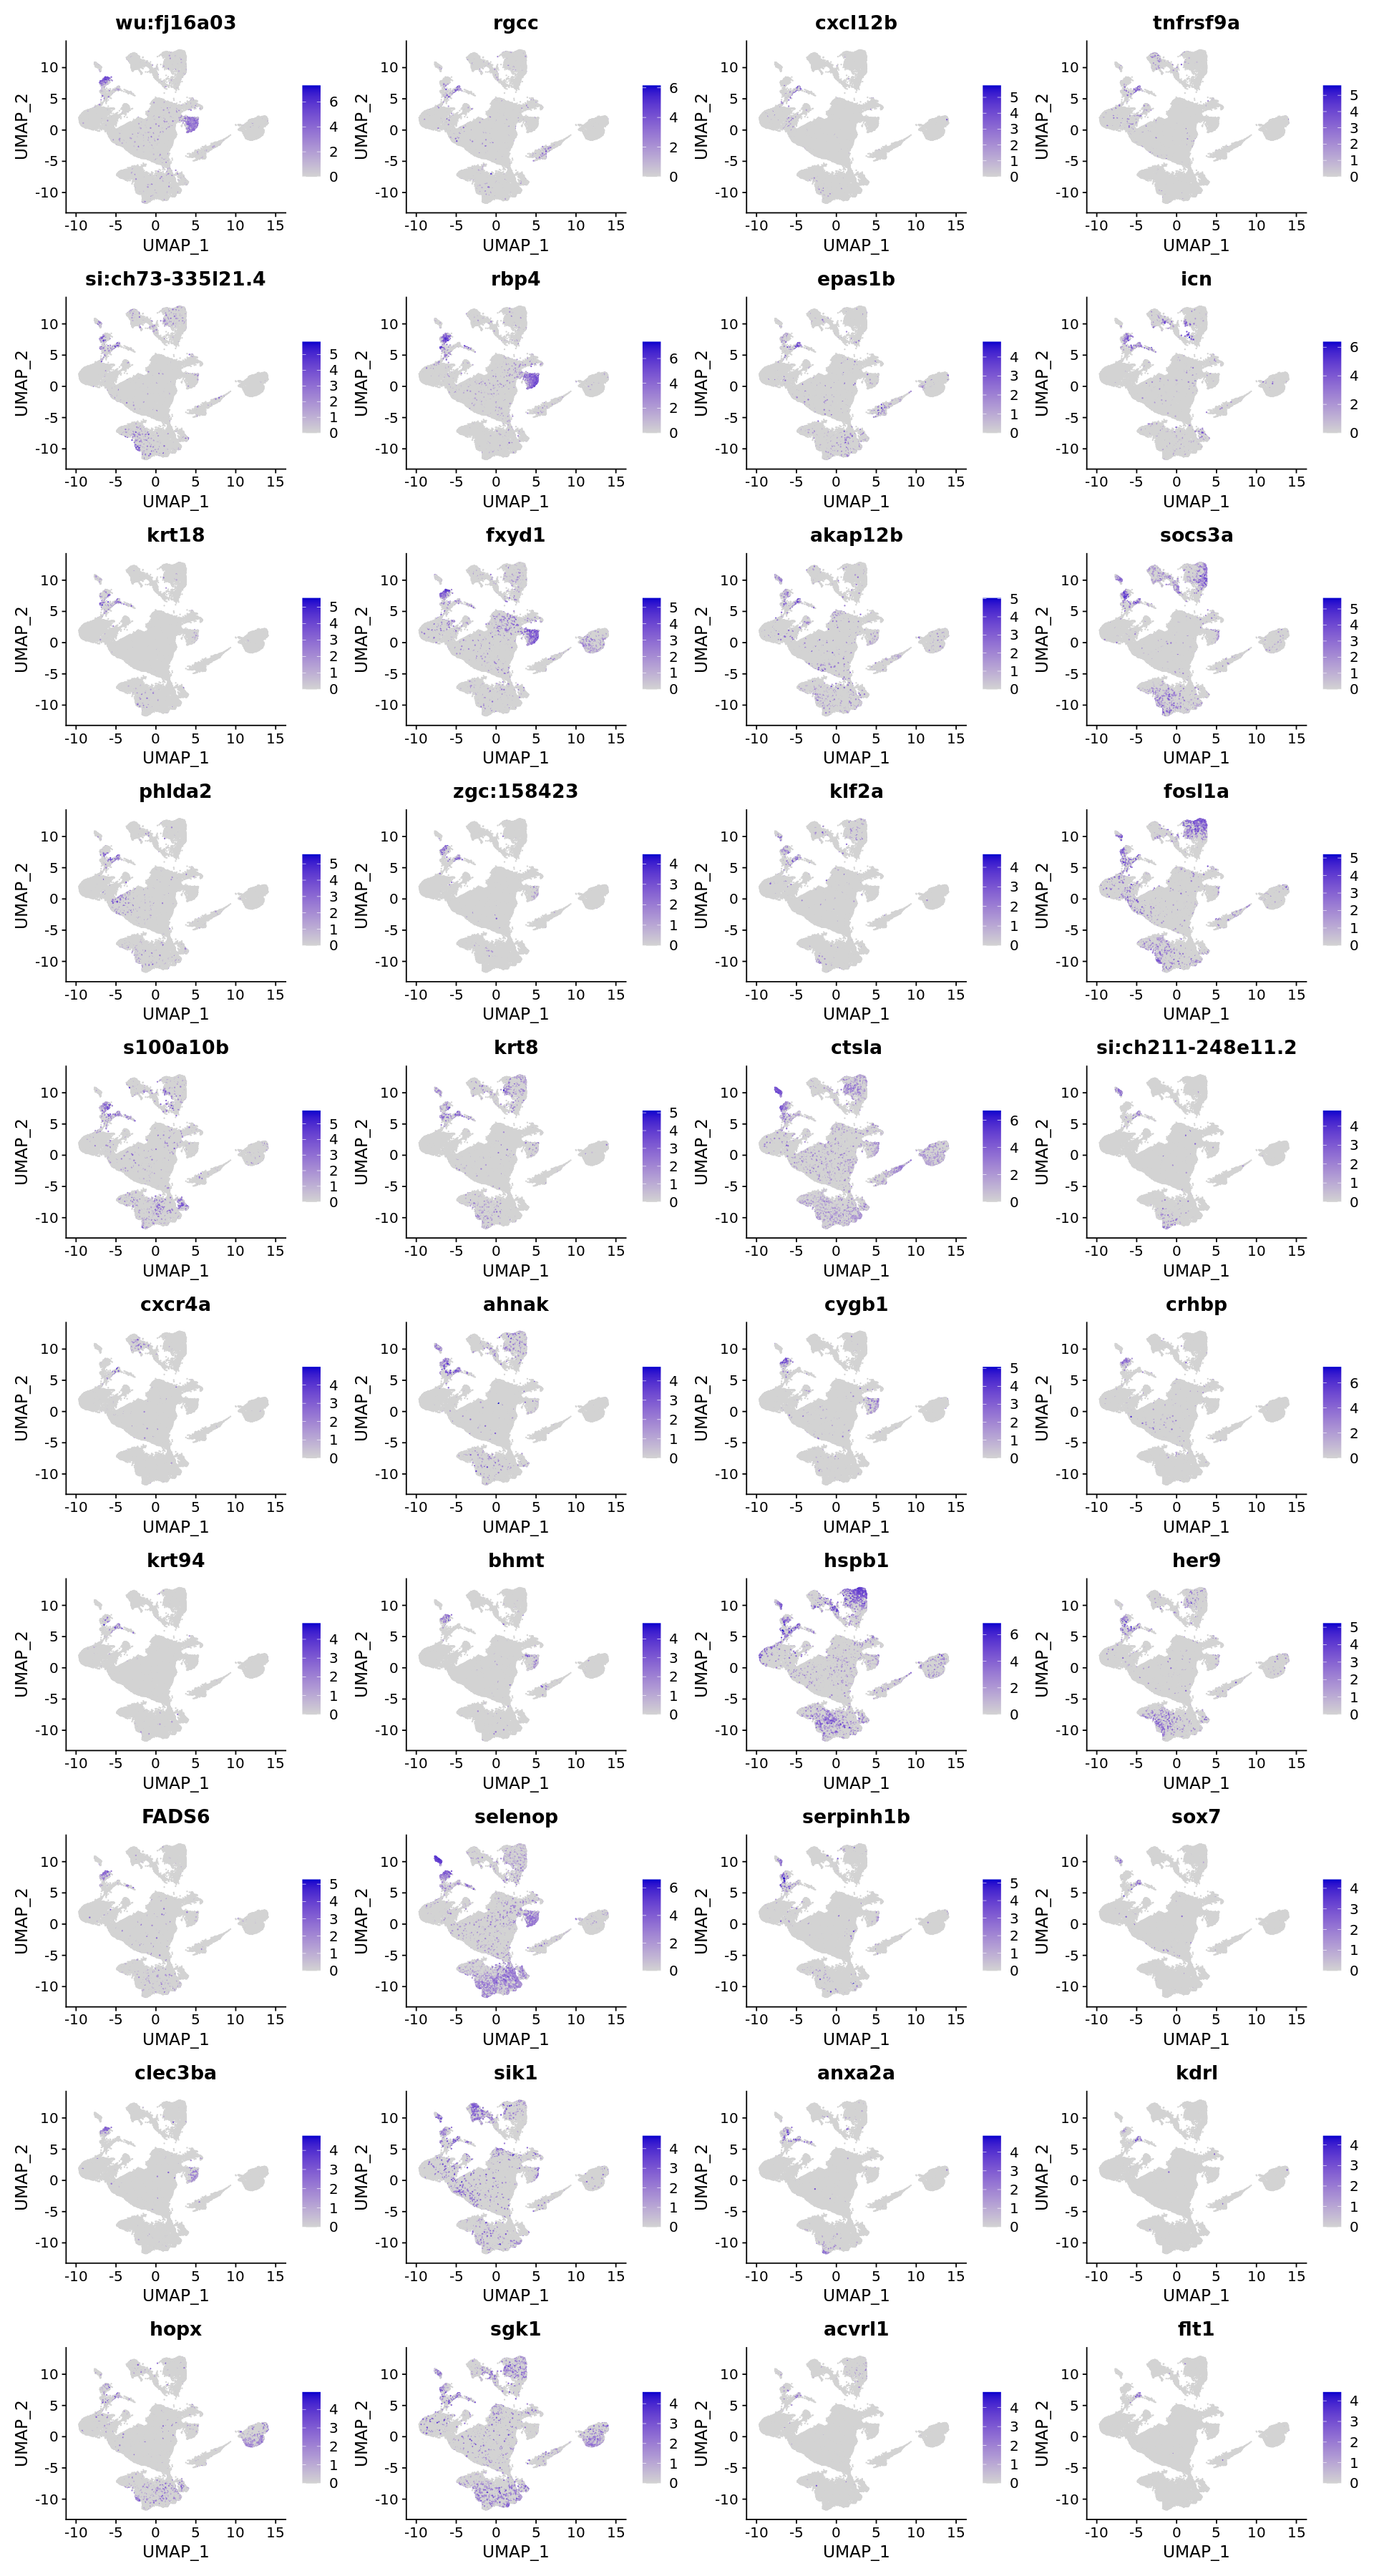

In [13]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = brain_pool, reduction = 'umap', features = `cluster_Other_top40`, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

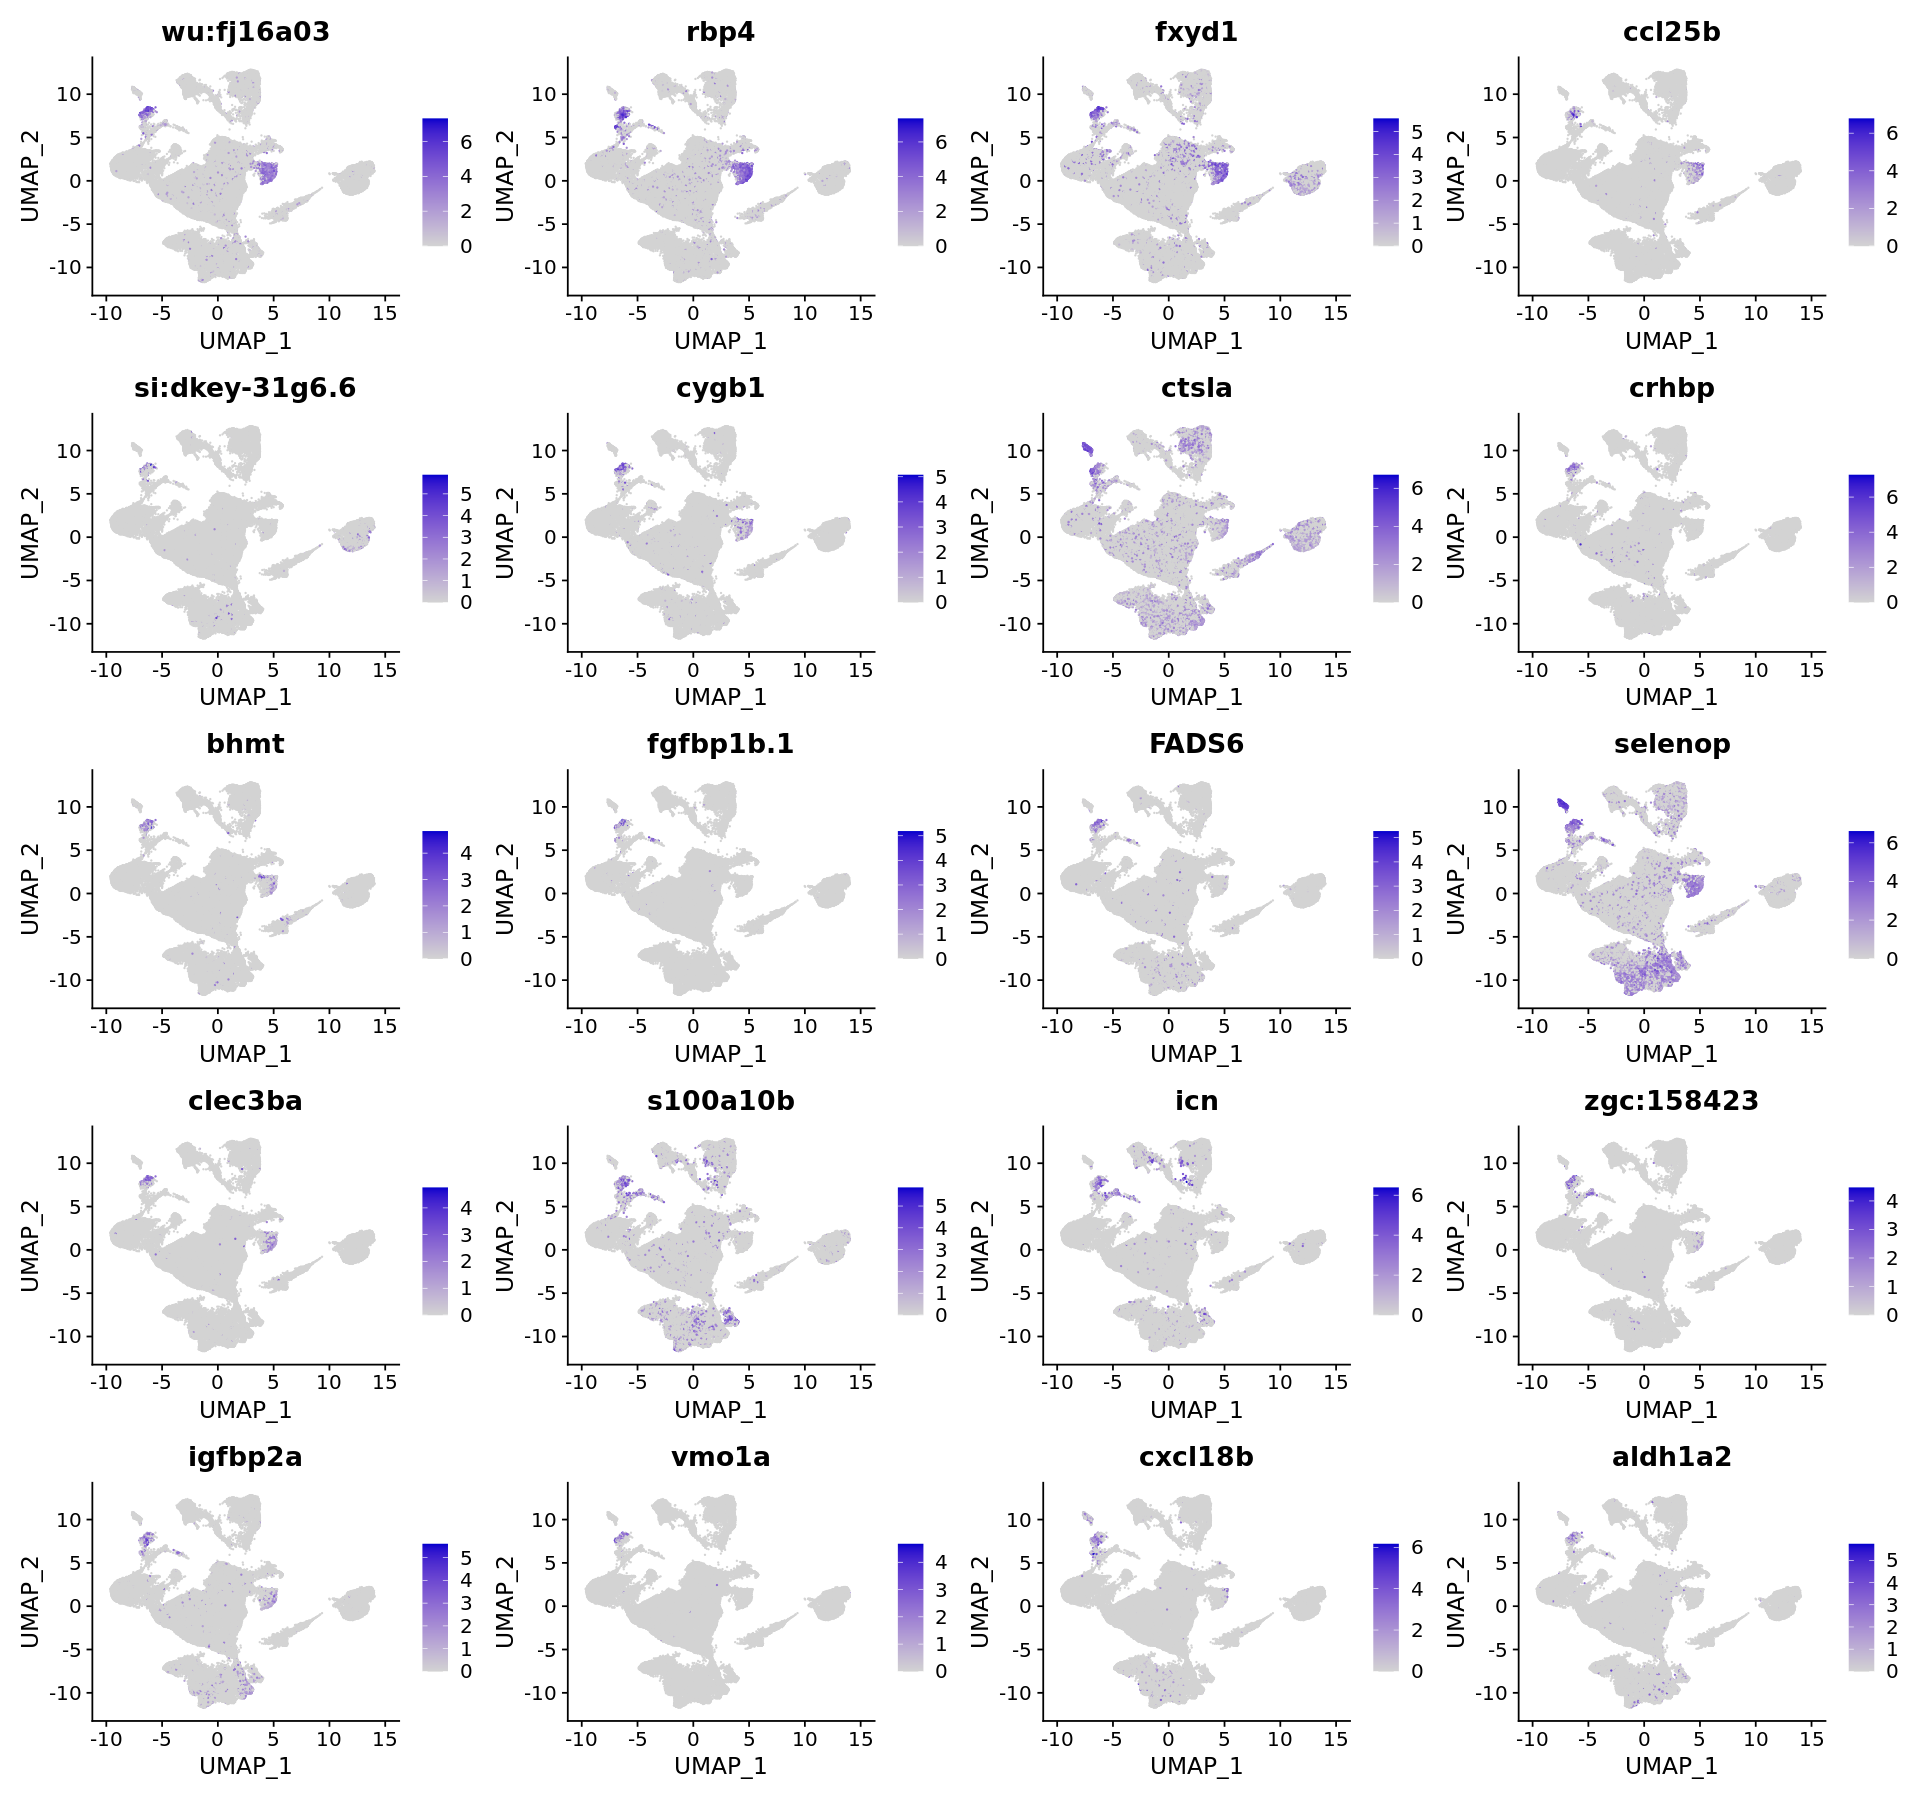

In [17]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = brain_pool, reduction = 'umap', features = cluster25_top20, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

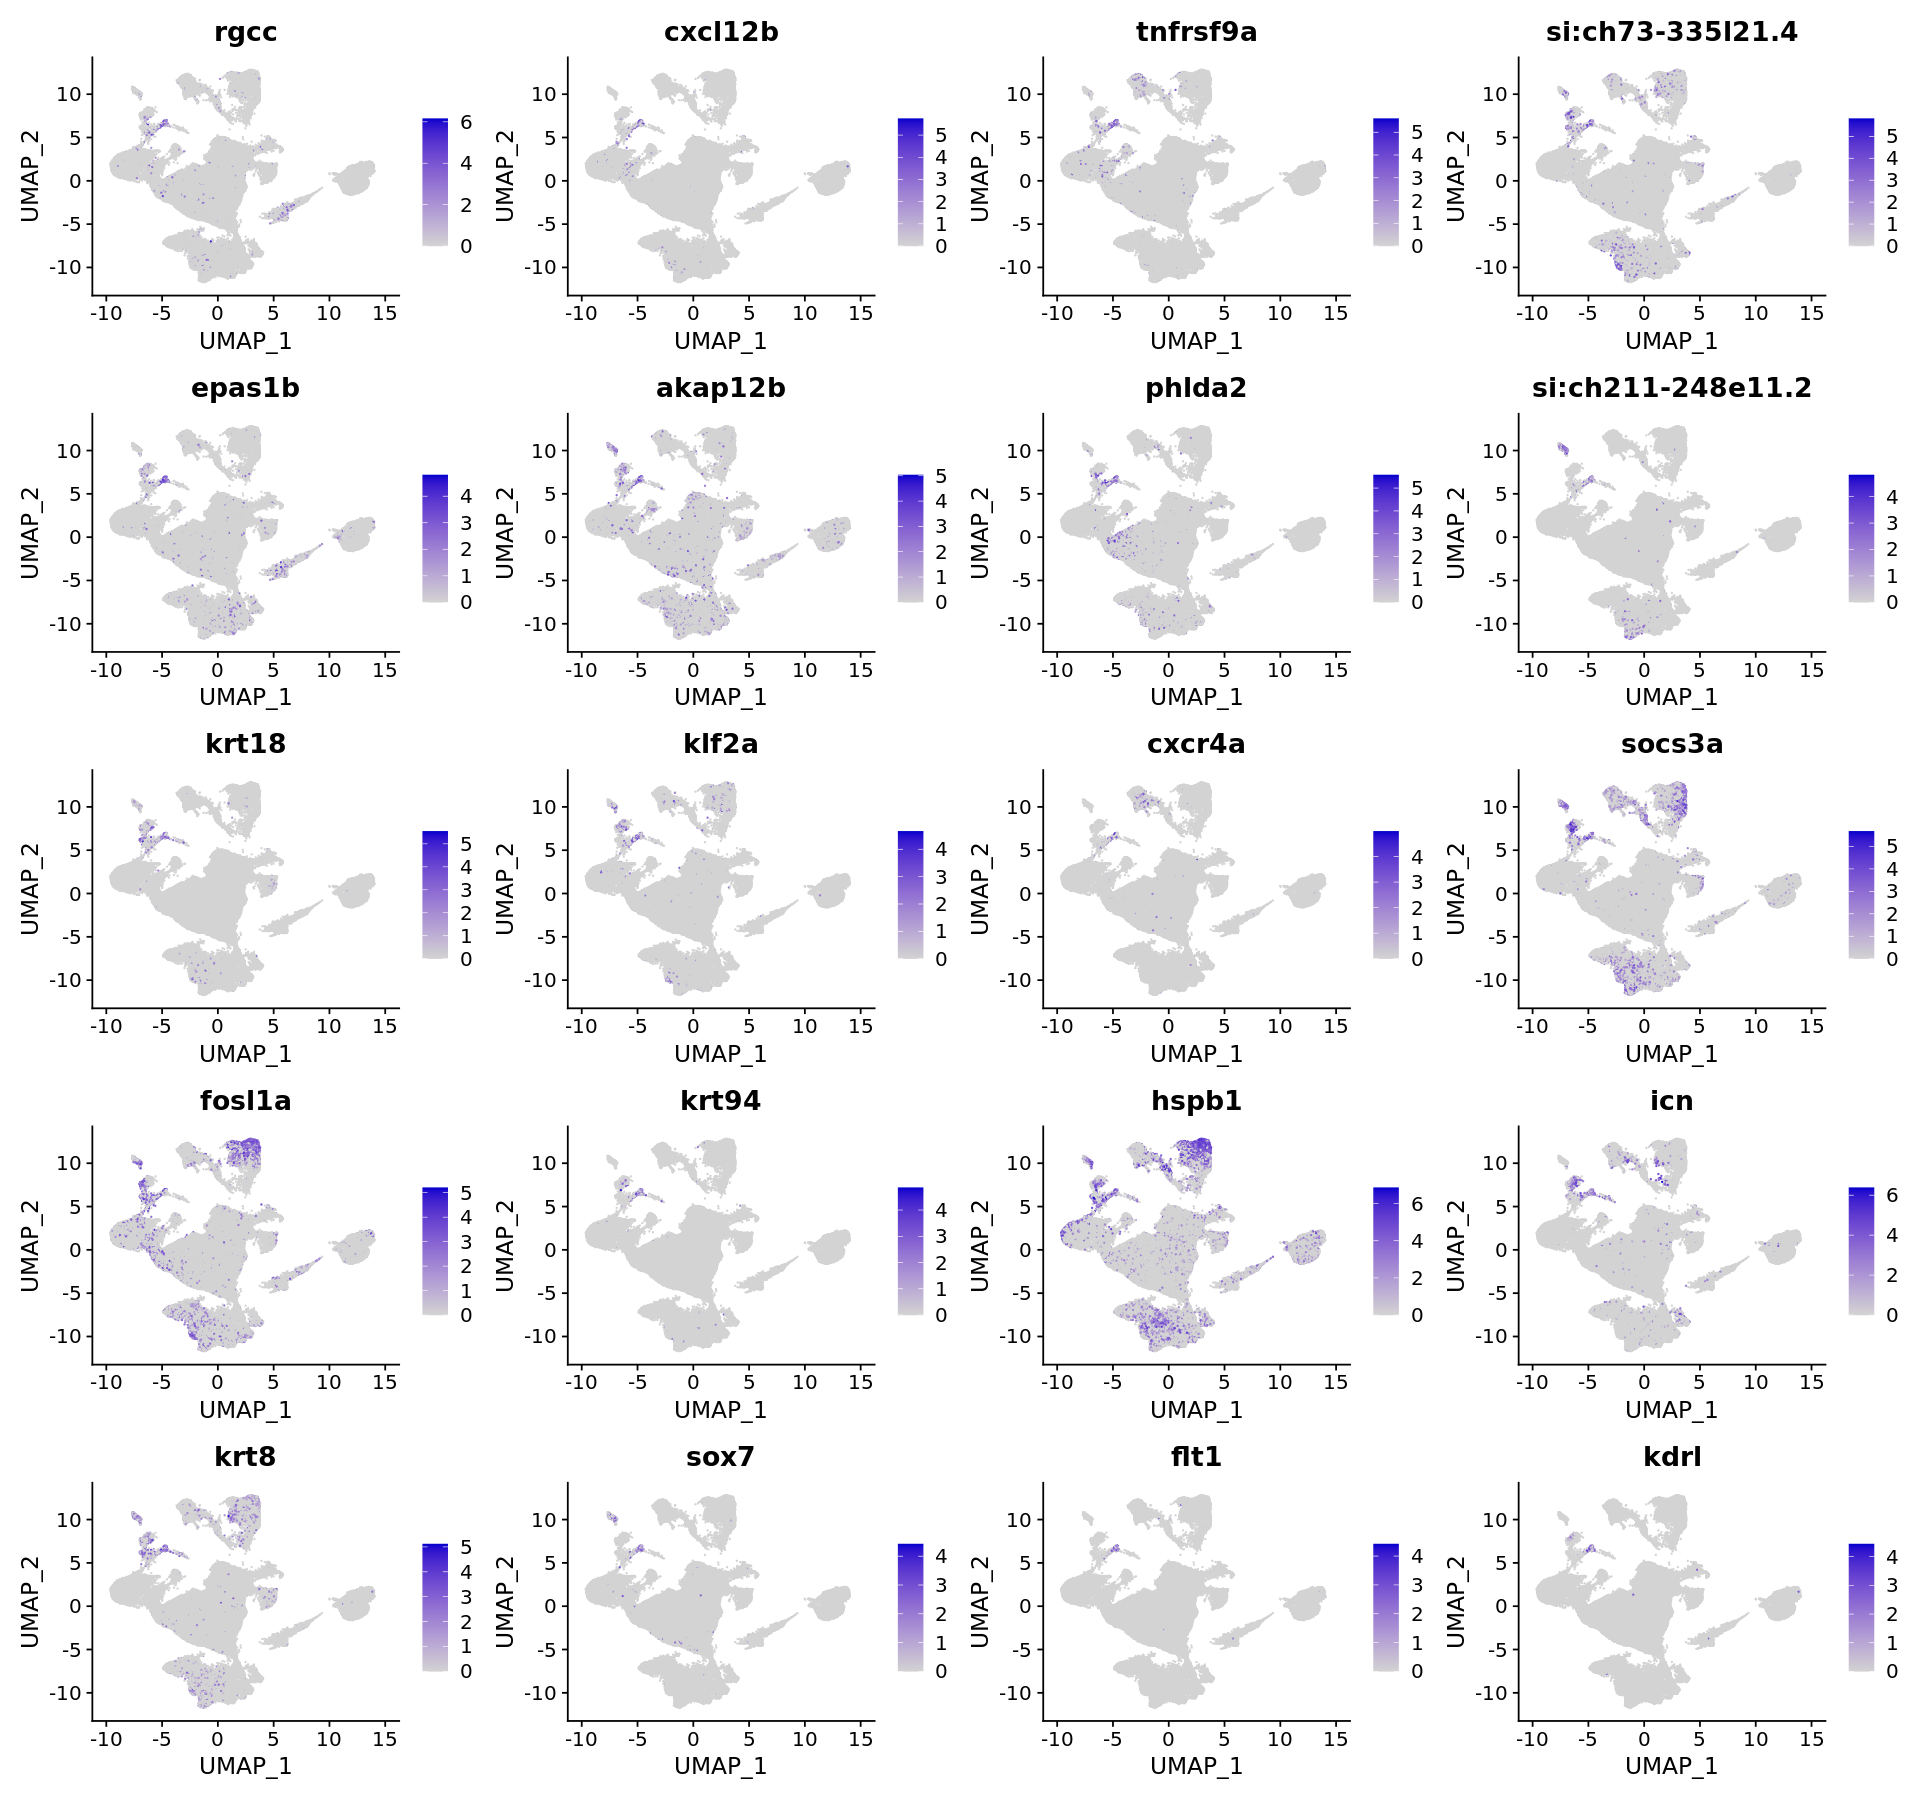

In [18]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = brain_pool, reduction = 'umap', features = cluster26_top20, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)